<a href="https://colab.research.google.com/github/SankalpC10/Colab_Notebooks/blob/main/BTYD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')


# # Replace 'your_file_path.xlsx' with the actual path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Datasets/online_retail_II.xlsx'


In [ ]:
df1 = pd.read_excel(file_path,sheet_name="Year 2009-2010")
df2 = pd.read_excel(file_path, sheet_name="Year 2010-2011")

In [ ]:
data_by_line_item_transaction_raw=pd.concat([df1, df2], sort=False)
data_by_line_item_transaction_raw["TotalPrice"] = data_by_line_item_transaction_raw["Quantity"] * data_by_line_item_transaction_raw["Price"]

In [ ]:
data_by_line_item_transaction_raw

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
CancelledTransactions = data_by_line_item_transaction_raw[data_by_line_item_transaction_raw["Invoice"].str.contains("C", na=False)]
CancelledTransactions

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [ ]:
#removing cancelled invoices and NaN invoices
data_by_line_item_transaction = data_by_line_item_transaction_raw[~data_by_line_item_transaction_raw["Invoice"].str.contains("C", na=False)]
data_by_line_item_transaction

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
#removing other NaN rows for Invoice Id , Quantity, Date etc
data_by_line_item_transaction_clean=data_by_line_item_transaction.dropna(subset = ['Invoice', 'Quantity', 'InvoiceDate','Price','Customer ID'])
data_by_line_item_transaction_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
from datetime import datetime
# date_format = '%Y/%m/%d %H:%M:%S'
date_format = '%d/%m/%Y %H:%M'

full_data_by_line_item_transaction_clean=data_by_line_item_transaction_clean.copy()

full_data_by_line_item_transaction_clean['InvoiceDate']=pd.to_datetime(data_by_line_item_transaction_clean['InvoiceDate'], format= date_format)

full_data_by_line_item_transaction_clean["Transaction Id"]=full_data_by_line_item_transaction_clean.index

full_data_by_line_item_transaction_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Transaction Id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,4
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,541905
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,541906
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,541907
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,541908


In [ ]:
full_data_by_line_item_transaction_clean.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Invoice,805620.0,36975.0,576339.0,542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,805620,4631,85123A,5188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,805620,5283,WHITE HANGING HEART T-LIGHT HOLDER,5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,805620.0,NaN,NaN,NaN,13.307665,1.0,2.0,5.0,12.0,80995.0,144.306739
InvoiceDate,805620,NaN,NaN,NaN,2011-01-02 10:26:35.704326144,2009-12-01 07:45:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:28:00,2011-12-09 12:50:00,NaN
Price,805620.0,NaN,NaN,NaN,3.206279,0.0,1.25,1.95,3.75,10953.5,29.197901
Customer ID,805620.0,NaN,NaN,NaN,15331.85625,12346.0,13982.0,15271.0,16805.0,18287.0,1696.768395
Country,805620,41,United Kingdom,725296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalPrice,805620.0,NaN,NaN,NaN,22.024564,0.0,4.95,11.85,19.5,168469.6,224.03215
Transaction Id,805620.0,NaN,NaN,NaN,271947.108021,0.0,143761.75,275942.5,401177.25,541909.0,150563.655488


In [ ]:
#This function aggregates the transactional data into different levels of time granularity - days , weeks, months, years

def aggregate_by_time(data,order_id,transaction_id,customer_id,timestamp,monetary_value,granularity="d"):
    df_monetary_value=data[[timestamp,customer_id,monetary_value]].groupby([
                 pd.Grouper(key=timestamp, axis=0,freq=granularity),
                 customer_id
               ]).sum()
    df_monetary_value=df_monetary_value.reset_index()

    df_invoice_count=data[[timestamp,order_id,customer_id]].groupby([
                 pd.Grouper(key=timestamp, axis=0,freq=granularity),
                 customer_id
               ]).nunique()
    df_invoice_count=df_invoice_count.reset_index()

    df_trxline_count=data[[timestamp,transaction_id,customer_id]].groupby([
                 pd.Grouper(key=timestamp, axis=0,freq=granularity),
                 customer_id
               ]).count()
    df_trxline_count=df_trxline_count.reset_index()

    df=df_monetary_value.merge(df_invoice_count, on=[timestamp,customer_id])
    df=df.merge(df_trxline_count, on=[timestamp,customer_id])

    df=df.rename(columns = {order_id:'Unique Count Of '+order_id,transaction_id:'Count of '+transaction_id})

    return df

In [ ]:
data_agg_by_year=aggregate_by_time(full_data_by_line_item_transaction_clean,
                                   "Invoice",
                                   "Transaction Id",
                                   "Customer ID",
                                   "InvoiceDate",
                                   "TotalPrice",
                                   "YE")

data_agg_by_year

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
0,2009-12-31,12346.0,113.50,5,5
1,2009-12-31,12358.0,1429.83,1,17
2,2009-12-31,12359.0,838.89,2,34
3,2009-12-31,12362.0,130.00,1,1
4,2009-12-31,12417.0,317.60,2,19
...,...,...,...,...,...
9403,2011-12-31,18280.0,180.60,1,10
9404,2011-12-31,18281.0,80.82,1,7
9405,2011-12-31,18282.0,178.05,2,12
9406,2011-12-31,18283.0,2094.88,16,756


In [ ]:
data_agg_by_month=aggregate_by_time(full_data_by_line_item_transaction_clean,
                                   "Invoice",
                                   "Transaction Id",
                                   "Customer ID",
                                   "InvoiceDate",
                                   "TotalPrice",
                                   "ME")

data_agg_by_month

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
0,2009-12-31,12346.0,113.50,5,5
1,2009-12-31,12358.0,1429.83,1,17
2,2009-12-31,12359.0,838.89,2,34
3,2009-12-31,12362.0,130.00,1,1
4,2009-12-31,12417.0,317.60,2,19
...,...,...,...,...,...
25593,2011-12-31,18245.0,894.25,1,55
25594,2011-12-31,18272.0,367.88,1,23
25595,2011-12-31,18273.0,51.00,1,1
25596,2011-12-31,18282.0,77.84,1,5


In [ ]:
data_agg_by_week=aggregate_by_time(full_data_by_line_item_transaction_clean,
                                   "Invoice",
                                   "Transaction Id",
                                   "Customer ID",
                                   "InvoiceDate",
                                   "TotalPrice",
                                   "W")

data_agg_by_week

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
0,2009-12-06,12359.0,760.69,1,32
1,2009-12-06,12362.0,130.00,1,1
2,2009-12-06,12417.0,309.10,1,18
3,2009-12-06,12435.0,1008.00,1,1
4,2009-12-06,12437.0,578.28,1,27
...,...,...,...,...,...
31361,2011-12-11,18225.0,330.28,1,16
31362,2011-12-11,18237.0,125.75,1,8
31363,2011-12-11,18272.0,367.88,1,23
31364,2011-12-11,18273.0,51.00,1,1


In [ ]:
data_agg_by_day=aggregate_by_time(full_data_by_line_item_transaction_clean,
                                   "Invoice",
                                   "Transaction Id",
                                   "Customer ID",
                                   "InvoiceDate",
                                   "TotalPrice",
                                   "d")

data_agg_by_day

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
0,2009-12-01,12362.0,130.00,1,1
1,2009-12-01,12490.0,603.94,1,21
2,2009-12-01,12533.0,929.92,1,44
3,2009-12-01,12636.0,141.00,1,1
4,2009-12-01,12682.0,426.30,1,19
...,...,...,...,...,...
33107,2011-12-09,17428.0,415.60,1,3
33108,2011-12-09,17490.0,730.70,2,22
33109,2011-12-09,17581.0,984.68,3,35
33110,2011-12-09,17754.0,200.99,1,24


In [ ]:
full_data_by_line_item_transaction_clean[full_data_by_line_item_transaction_clean['Customer ID'] == 14911.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Transaction Id
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE,9.0,440
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE,15.0,441
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE,31.6,442
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE,12.6,443
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE,13.5,444
...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0,539151
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,539152
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,539153
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,539154


In [ ]:
data_agg_by_day[data_agg_by_day['Customer ID'] == 14911.0]

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
38,2009-12-01,14911.0,733.63,1,30
495,2009-12-07,14911.0,1641.30,2,60
572,2009-12-08,14911.0,728.05,1,23
725,2009-12-10,14911.0,377.57,1,19
1003,2009-12-15,14911.0,1413.34,1,58
...,...,...,...,...,...
32460,2011-12-01,14911.0,676.95,2,34
32646,2011-12-04,14911.0,773.54,1,30
32710,2011-12-05,14911.0,587.40,2,17
32922,2011-12-07,14911.0,3856.89,3,166


In [ ]:
data_agg_by_week[data_agg_by_week['Customer ID'] == 14911.0]

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
178,2009-12-06,14911.0,733.63,1,30
599,2009-12-13,14911.0,2746.92,4,102
984,2009-12-20,14911.0,3638.69,4,120
1334,2010-01-10,14911.0,3949.86,3,64
1717,2010-01-24,14911.0,5313.82,4,87
...,...,...,...,...,...
29081,2011-11-13,14911.0,8078.87,9,244
29647,2011-11-20,14911.0,5418.08,10,263
30143,2011-11-27,14911.0,4463.97,9,187
30697,2011-12-04,14911.0,4163.25,7,193


In [ ]:
data_agg_by_month[data_agg_by_month['Customer ID'] == 14911.0]

,InvoiceDate,Customer ID,TotalPrice,Unique Count Of Invoice,Count of Transaction Id
399,2009-12-31,14911.0,7119.24,9,252
1280,2010-01-31,14911.0,12500.52,13,263
2024,2010-02-28,14911.0,9661.91,12,349
2907,2010-03-31,14911.0,11548.16,18,502
3919,2010-04-30,14911.0,4872.21,7,227
4873,2010-05-31,14911.0,10824.22,12,457
5852,2010-06-30,14911.0,12208.95,19,514
6873,2010-07-31,14911.0,8002.56,14,310
7779,2010-08-31,14911.0,5970.17,13,276
8806,2010-09-30,14911.0,23538.31,23,671


# Basic Exploratory Data Analysis

<Axes: title={'center': 'Purchase Values vs Time'}, xlabel='InvoiceDate'>

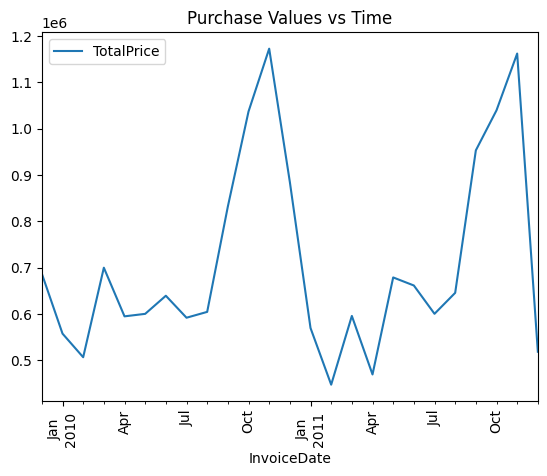

In [ ]:
df_TotalPurchaseValueByMonth=data_agg_by_month[["InvoiceDate","TotalPrice"]].groupby("InvoiceDate").agg('sum')

df_TotalPurchaseValueByMonth.plot(kind='line', rot='vertical',title='Purchase Values vs Time')

<Axes: ylabel='Country'>

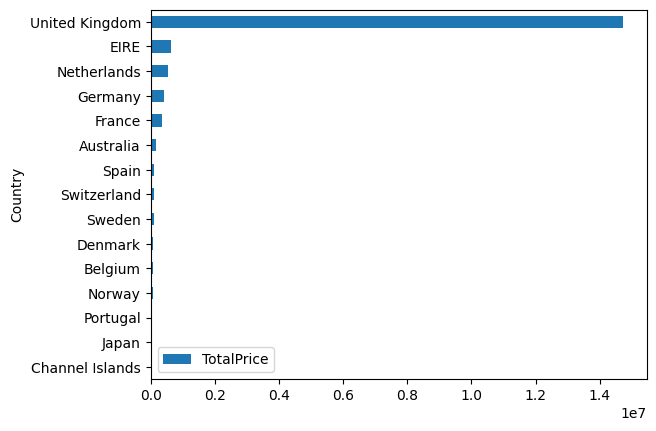

In [ ]:
#Top Countries By Spend
df_country_spend = pd.DataFrame(full_data_by_line_item_transaction_clean.groupby("Country")['TotalPrice'].sum())
df_country_spend.sort_values("TotalPrice",ascending=True).tail(15).plot(kind='barh')

<Axes: ylabel='Description'>

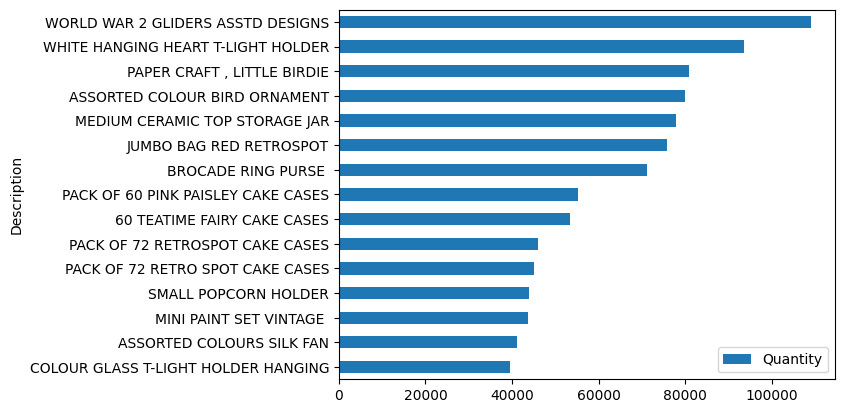

In [ ]:
#Top Products By Quantity Purchased
df_product_quantity = pd.DataFrame(full_data_by_line_item_transaction_clean.groupby("Description")["Quantity"].sum())
df_product_quantity.sort_values("Quantity",ascending=True).tail(15).plot(kind='barh')

array([[<Axes: title={'center': 'TotalPrice'}>]], dtype=object)

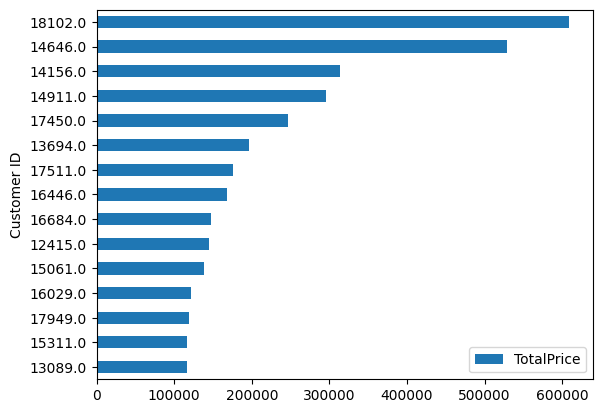

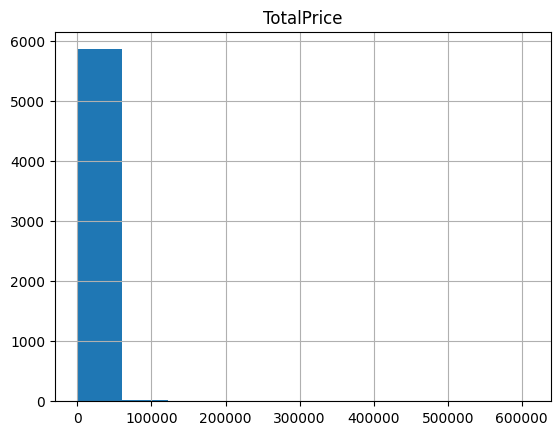

In [ ]:
#Top Customers By Spend
df_customer_spend = pd.DataFrame(full_data_by_line_item_transaction_clean.groupby("Customer ID")['TotalPrice'].sum())
df_customer_spend.sort_values("TotalPrice",ascending=True).tail(15).plot(kind='barh')
df_customer_spend.hist()
#very skewed behaviors

,Customer ID
Earliest Order Date,
2009-12-31,955
2010-01-31,383
2010-02-28,376
2010-03-31,443
2010-04-30,294
2010-05-31,254
2010-06-30,270
2010-07-31,186
2010-08-31,162


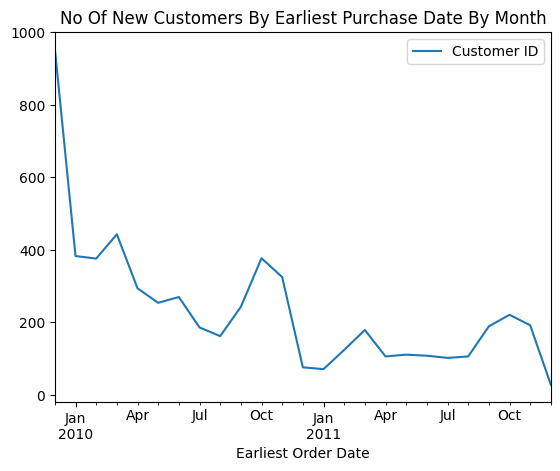

In [ ]:
customer_earliest_order_date=pd.DataFrame(data_agg_by_day.groupby(['Customer ID'])['InvoiceDate'].min())
customer_earliest_order_date.rename(columns = {'InvoiceDate':'Earliest Order Date'}, inplace = True)
customer_earliest_order_date=customer_earliest_order_date.reset_index()
customer_joining_by_month=pd.DataFrame(customer_earliest_order_date.groupby([
                 pd.Grouper(key='Earliest Order Date', axis=0,freq='ME')
               ])["Customer ID"].count())


customer_joining_by_month.plot(title='No Of New Customers By Earliest Purchase Date By Month')
customer_joining_by_month

In [ ]:
min_date=min(full_data_by_line_item_transaction_clean['InvoiceDate'])
max_date = max(full_data_by_line_item_transaction_clean['InvoiceDate'])
full_max_date=max_date

In [ ]:
display("Max Date: "+str(max_date))
display("Min Date: "+str(min_date))
display("Total Dur Days: " +str((max_date-min_date).days))
display("Total Dur Weeks: " +str(round((max_date-min_date).days/7,1)))
display("Total Dur Mths: " +str(round((max_date-min_date).days/30.417,1)))

'Max Date: 2011-12-09 12:50:00'

'Min Date: 2009-12-01 07:45:00'

'Total Dur Days: 738'

'Total Dur Weeks: 105.4'

'Total Dur Mths: 24.3'

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=full_data_by_line_item_transaction_clean.sort_values('InvoiceDate')

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

In [ ]:
train_min_date=min(train_data['InvoiceDate'])
train_max_date = max(train_data['InvoiceDate'])
display("Training Data Max Date: "+str(train_max_date))
display("Training Data Min Date: "+str(train_min_date))
display("Training Data Total Dur Days: " +str((train_max_date-train_min_date).days))
display("Training Data Total Dur Weeks: " +str(round((train_max_date-train_min_date).days/7,1)))
display("Training Data Total Dur Mths: " +str(round((train_max_date-train_min_date).days/30.417,1)))

'Training Data Max Date: 2011-06-12 13:51:00'

'Training Data Min Date: 2009-12-01 07:45:00'

'Training Data Total Dur Days: 558'

'Training Data Total Dur Weeks: 79.7'

'Training Data Total Dur Mths: 18.3'

# Develop function to calculate RFM Characteristics

This function calculates the RFM figures both in a naive way to demonstrate the differences with the lifetimes/Py MC automated summarizer functions such as:

Frequency is minus one as first purchase is by default NOT counted
Frequency estimate depends on time granularity (e.g. Multiple same day purchases only counts as single purchase at a date level
Recency - Unlike some sources define this alternatively as time since last order or purchase BUT for BTYD modelling is time between first purchase and their latest purchase
Monetary value is actually calculated EXCLUDING the first purchase by the customer
Reference https://lifetimes.readthedocs.io/en/latest/Quickstart.html#the-shape-of-your-data

- Frequency represents the number of repeat purchases the customer has made. This means that it’s ONE LESS the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.

- T (Age) represents the age of the customer in whatever time units chosen This is equal to the duration between a customer’s first purchase and the end of the period under study.

- Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

- Monetary_value represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.



In [ ]:
calibration_period_end = train_max_date
observation_period_end = full_max_date
NoOfDaysToPredict = observation_period_end-calibration_period_end

print(NoOfDaysToPredict.days)

179


In [ ]:
def create_RFM_Table(data,order_id,customer_id,timestamp,monetary_value,granularity):

    max_date=data[timestamp].max()
    latest_order_date = pd.DataFrame(data.groupby([customer_id])[timestamp].max())
    latest_order_date.rename(columns = {timestamp:'Most Recent Order Date'}, inplace = True)
    latest_order_date["customer_unique_id"]=latest_order_date.index

    earliest_order_date=pd.DataFrame(data.groupby([customer_id])[timestamp].min())
    earliest_order_date.rename(columns = {timestamp:'Earliest Order Date'}, inplace = True)
    earliest_order_date["Age"]=(max_date-earliest_order_date["Earliest Order Date"]).dt.round("d")
    earliest_order_date['Age In Days'] = earliest_order_date['Age'] / pd.to_timedelta(1, unit='D')
    earliest_order_date.drop(['Age'], axis=1, inplace=True)
    earliest_order_date["customer_unique_id"]=earliest_order_date.index

    recency_df=pd.merge(latest_order_date[["Most Recent Order Date"]],
                            earliest_order_date[["Earliest Order Date","Age In Days"]],
                            left_index=True, right_index=True)

    recency_df["recency"]=recency_df["Most Recent Order Date"]-recency_df["Earliest Order Date"]

    recency_df["recency"]=recency_df["recency"].dt.round("d")
    recency_df.rename(columns = {"recency":"Recency In Days"}, inplace = True)
    recency_df['Recency In Days'] = recency_df['Recency In Days'] / pd.to_timedelta(1, unit='D')
    recency_df[customer_id]=recency_df.index
    recency_df.reset_index(inplace = True, drop = True)

    if granularity=="True":
#This snip provides a higher granularity -count by specific time stamp not just day
        frequency_df = data.groupby([customer_id]).agg({order_id: "nunique"}).reset_index()
        frequency_df.sort_values(order_id, ascending=[False])
        frequency_df.rename(columns = {order_id:'Frequency'}, inplace = True)

    else :
#This snip provides a granularity count by specific DATE - i.e multiple purchases on same day only count as ONE purchase
        data['InvoiceDateOnly'] = data[timestamp].dt.date
        first_date=data.groupby([customer_id,'InvoiceDateOnly']).first().reset_index()
        frequency_df= first_date.groupby([customer_id]).agg({order_id: "nunique"}).reset_index()
        frequency_df.sort_values(order_id, ascending=[False])
        frequency_df.rename(columns = {order_id:'Frequency'}, inplace = True)

    if granularity=="True":

        monetary_df = data.groupby(customer_id, as_index = False)[monetary_value].sum()
        monetary_df.rename(columns = {monetary_value:'Total Monetary Value'}, inplace = True)

    else :
        CustomerRecords=data
        CustomerRecords['InvoiceDateOnly'] = data[timestamp].dt.date
        countOfPurchByDate=CustomerRecords.groupby([customer_id,'InvoiceDateOnly']).count().reset_index()
        countOfPurchByDate=countOfPurchByDate.rename(columns = {order_id:'Count Of Purchases On Same Day'})

        TotalTrxRowsWithMultipleSameDayPurch=str(len(countOfPurchByDate[countOfPurchByDate['Count Of Purchases On Same Day'] > 1]))
        TotalTrxRows=str(len(countOfPurchByDate[countOfPurchByDate['Count Of Purchases On Same Day'] > 0]))

        ##
        sumOfPurchByDate = CustomerRecords.groupby([customer_id,'InvoiceDateOnly'], as_index = False)[monetary_value].sum().reset_index()
        sumOfPurchByDate.rename(columns = {'TotalPrice':'Total Purchase Value On Same Day'}, inplace = True)

        countOfPurchByDate["Total Purchase Value On Same Day"]=sumOfPurchByDate["Total Purchase Value On Same Day"]
        countOfPurchByDate=countOfPurchByDate[[customer_id,"InvoiceDateOnly","Count Of Purchases On Same Day","Total Purchase Value On Same Day"]]
        countOfPurchByDate.sort_values(by=[customer_id, 'InvoiceDateOnly'])

        valueOfFirstPurchase=countOfPurchByDate.groupby(customer_id).first()
        valueOfFirstPurchase.reset_index(inplace=True)

        monetary_df = CustomerRecords.groupby(customer_id, as_index = False)[monetary_value].sum()
        monetary_df.rename(columns = {monetary_value:'Total Monetary Value'}, inplace = True)
        monetary_df=monetary_df.merge(valueOfFirstPurchase[[customer_id,"Total Purchase Value On Same Day"]],on="Customer ID", how='left')
        monetary_df = monetary_df.rename(columns={"Total Purchase Value On Same Day": 'First Time Purchase Value'})
    ##

    RFM = pd.merge(frequency_df,recency_df, on=customer_id)
    RFM = pd.merge(RFM, monetary_df, on=customer_id)
    RFM["Frequency Minus 1"]=RFM["Frequency"]-1

    if granularity=="True":
        RFM["Average Time Between Orders In Days"]=""
        RFM["Average Monetary Value Per Order"]=""
        RFM=RFM[[customer_id,'Frequency','Frequency Minus 1','Recency In Days','Age In Days',
                  'Earliest Order Date','Most Recent Order Date',"Total Monetary Value",
                 "Average Time Between Orders In Days","Average Monetary Value Per Order"]]
    else:
        RFM["Average Time Between Orders In Days"]=RFM['Age In Days']/RFM['Frequency Minus 1']
        RFM["Average Monetary Value Per Order"]=(RFM['Total Monetary Value']-RFM['First Time Purchase Value'])/RFM['Frequency Minus 1']
        RFM=RFM[[customer_id,'Frequency','Frequency Minus 1','Recency In Days','Age In Days',
                  'Earliest Order Date','Most Recent Order Date',"Total Monetary Value",
                 "First Time Purchase Value","Average Time Between Orders In Days","Average Monetary Value Per Order"]]

    RFM.sort_values('Frequency',ascending=[False])

    RFM=RFM.sort_values('Frequency',ascending=[False])

    RFM["Average Time Between Orders In Days"]=RFM["Average Time Between Orders In Days"].replace([np.inf, -np.inf], 0)
    RFM["Average Monetary Value Per Order"]=RFM["Average Monetary Value Per Order"].fillna(0)

    return RFM

In [ ]:
create_RFM_Table(train_data,'Transaction Id','Customer ID','InvoiceDate','TotalPrice',"True")

,Customer ID,Frequency,Frequency Minus 1,Recency In Days,Age In Days,Earliest Order Date,Most Recent Order Date,Total Monetary Value,Average Time Between Orders In Days,Average Monetary Value Per Order
4605,17841.0,7357,7356,554.0,557.0,2009-12-02 15:41:00,2011-06-09 16:10:00,42758.96,,
2126,14911.0,7213,7212,555.0,558.0,2009-12-01 11:41:00,2011-06-09 13:46:00,195537.25,,
1861,14606.0,5281,5280,553.0,556.0,2009-12-03 12:40:00,2011-06-09 13:08:00,25810.44,,
309,12748.0,4054,4053,553.0,555.0,2009-12-04 17:31:00,2011-06-10 16:47:00,32897.91,,
2472,15311.0,3307,3306,553.0,558.0,2009-12-01 11:21:00,2011-06-07 13:56:00,89729.37,,
...,...,...,...,...,...,...,...,...,...,...
1423,14095.0,1,0,0.0,542.0,2009-12-17 12:49:00,2009-12-17 12:49:00,2.95,,
1419,14090.0,1,0,0.0,144.0,2011-01-19 10:51:00,2011-01-19 10:51:00,76.32,,
1624,14328.0,1,0,0.0,258.0,2010-09-27 16:01:00,2010-09-27 16:01:00,445.05,,
1409,14079.0,1,0,0.0,502.0,2010-01-26 17:19:00,2010-01-26 17:19:00,243.63,,


In [ ]:
IndividualCustomerRecords=train_data[train_data['Customer ID'] == 14911.0]
IndividualCustomerRecords.head(45)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Transaction Id
457,489520,22282,12 EGG HOUSE PAINTED WOOD,4,2009-12-01 11:41:00,12.75,14911.0,EIRE,51.00,457
459,489520,22089,PAPER BUNTING VINTAGE PAISLEY,6,2009-12-01 11:41:00,2.95,14911.0,EIRE,17.70,459
460,489520,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,4,2009-12-01 11:41:00,3.75,14911.0,EIRE,15.00,460
461,489520,20734,SILVER MINI TAPE MEASURE,10,2009-12-01 11:41:00,0.85,14911.0,EIRE,8.50,461
462,489520,21133,PAINTED BIRD ASSORTED CHRISTMAS,12,2009-12-01 11:41:00,1.69,14911.0,EIRE,20.28,462
463,489520,35071,ASSORTED SANTA CHRISTMAS DECORATION,12,2009-12-01 11:41:00,0.85,14911.0,EIRE,10.20,463
467,489520,21485,RED SPOT HEART HOT WATER BOTTLE,3,2009-12-01 11:41:00,4.95,14911.0,EIRE,14.85,467
465,489520,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2009-12-01 11:41:00,2.95,14911.0,EIRE,17.70,465
466,489520,22121,NOEL WOODEN BLOCK LETTERS,3,2009-12-01 11:41:00,5.95,14911.0,EIRE,17.85,466
468,489520,84836,ZINC METAL HEART DECORATION,12,2009-12-01 11:41:00,1.25,14911.0,EIRE,15.00,468


In [ ]:
def AggregatePurchasesByCustomerByDate(data,order_id,customer_id,timestamp,monetary_value):
    CustomerRecords=data
    CustomerRecords['InvoiceDateOnly'] = train_data[timestamp].dt.date
    countOfPurchByDate=CustomerRecords.groupby([customer_id,'InvoiceDateOnly']).count().reset_index()
    countOfPurchByDate=countOfPurchByDate.rename(columns = {order_id:'Count Of Purchases On Same Day'})

    sumOfPurchByDate = CustomerRecords.groupby([customer_id,'InvoiceDateOnly'], as_index = False)[monetary_value].sum().reset_index()
    sumOfPurchByDate.rename(columns = {'TotalPrice':'Total Purchase Value On Same Day'}, inplace = True)

    TotalTrxRowsWithMultipleSameDayPurch=str(len(countOfPurchByDate[countOfPurchByDate['Count Of Purchases On Same Day'] > 1]))
    TotalTrxRows=str(len(countOfPurchByDate[countOfPurchByDate['Count Of Purchases On Same Day'] > 0]))

#     print("There are "+TotalTrxRowsWithMultipleSameDayPurch+" of records with multiple purchase on"+
#     " the same day out of the total "+TotalTrxRows+" of records")

    RecordsWithMultiplePurchasesPerDay=countOfPurchByDate[countOfPurchByDate['Count Of Purchases On Same Day'] > 1]

    RecordsWithMultiplePurchasesPerDay=RecordsWithMultiplePurchasesPerDay.merge(sumOfPurchByDate[[customer_id,"InvoiceDateOnly","Total Purchase Value On Same Day"]],on=["Customer ID","InvoiceDateOnly"], how='left')

    RecordsWithMultiplePurchasesPerDay = RecordsWithMultiplePurchasesPerDay[[customer_id,"InvoiceDateOnly",
                                                                            "Count Of Purchases On Same Day",
                                                                            "Total Purchase Value On Same Day"]]

    return RecordsWithMultiplePurchasesPerDay

In [ ]:
AggPurchasesByCustomerByDate=AggregatePurchasesByCustomerByDate(train_data,'Transaction Id','Customer ID','InvoiceDate','TotalPrice')
AggPurchasesByCustomerByDate

,Customer ID,InvoiceDateOnly,Count Of Purchases On Same Day,Total Purchase Value On Same Day
0,12346.0,2009-12-14,3,90.00
1,12346.0,2009-12-18,2,23.50
2,12346.0,2010-01-04,2,45.00
3,12346.0,2010-03-02,5,27.05
4,12346.0,2010-06-28,19,142.31
...,...,...,...,...
22407,18286.0,2010-08-20,50,833.48
22408,18287.0,2010-05-17,54,1071.61
22409,18287.0,2010-09-21,21,892.60
22410,18287.0,2010-11-22,10,381.50


In [ ]:
AggPurchasesByCustomerByDate[AggPurchasesByCustomerByDate['Customer ID'] == 14911.0]

,Customer ID,InvoiceDateOnly,Count Of Purchases On Same Day,Total Purchase Value On Same Day
9818,14911.0,2009-12-01,30,733.63
9819,14911.0,2009-12-07,60,1641.30
9820,14911.0,2009-12-08,23,728.05
9821,14911.0,2009-12-10,19,377.57
9822,14911.0,2009-12-15,58,1413.34
...,...,...,...,...
9983,14911.0,2011-05-23,52,1007.75
9984,14911.0,2011-05-26,28,494.04
9985,14911.0,2011-06-07,13,254.31
9986,14911.0,2011-06-08,65,3351.32


In [ ]:
RFM_Train=create_RFM_Table(train_data,'Transaction Id','Customer ID','InvoiceDate','TotalPrice',"Day")

RFM_Train

,Customer ID,Frequency,Frequency Minus 1,Recency In Days,Age In Days,Earliest Order Date,Most Recent Order Date,Total Monetary Value,First Time Purchase Value,Average Time Between Orders In Days,Average Monetary Value Per Order
2126,14911.0,173,172,555.0,558.0,2009-12-01 11:41:00,2011-06-09 13:46:00,195537.25,733.63,3.244186,1132.579186
2472,15311.0,150,149,553.0,558.0,2009-12-01 11:21:00,2011-06-07 13:56:00,89729.37,823.02,3.744966,596.686913
1861,14606.0,140,139,553.0,556.0,2009-12-03 12:40:00,2011-06-09 13:08:00,25810.44,215.00,4.000000,184.139856
309,12748.0,134,133,553.0,555.0,2009-12-04 17:31:00,2011-06-10 16:47:00,32897.91,220.90,4.172932,245.691805
4605,17841.0,128,127,554.0,557.0,2009-12-02 15:41:00,2011-06-09 16:10:00,42758.96,530.76,4.385827,332.505512
...,...,...,...,...,...,...,...,...,...,...,...
3461,16492.0,1,0,0.0,360.0,2010-06-17 08:20:00,2010-06-17 08:20:00,385.56,385.56,0.000000,0.000000
3460,16491.0,1,0,0.0,233.0,2010-10-22 15:42:00,2010-10-22 15:42:00,801.66,801.66,0.000000,0.000000
3459,16490.0,1,0,0.0,256.0,2010-09-29 16:30:00,2010-09-29 16:30:00,205.41,205.41,0.000000,0.000000
3456,16486.0,1,0,0.0,357.0,2010-06-20 12:16:00,2010-06-20 12:16:00,134.36,134.36,0.000000,0.000000


## Create Combined View Of HoldOut and Calib Data
Combines view of RFM for Train Data Period and Frequency (Purch Count) & Total Purchase Value In Test Data Period

In [ ]:
RFM_Full=create_RFM_Table(data,'Transaction Id','Customer ID','InvoiceDate','TotalPrice',"Day")
RFM_Full

,Customer ID,Frequency,Frequency Minus 1,Recency In Days,Age In Days,Earliest Order Date,Most Recent Order Date,Total Monetary Value,First Time Purchase Value,Average Time Between Orders In Days,Average Monetary Value Per Order
2541,14911.0,255,254,737.0,738.0,2009-12-01 11:41:00,2011-12-08 15:54:00,295972.63,733.63,2.905512,1162.358268
400,12748.0,203,202,735.0,735.0,2009-12-04 17:31:00,2011-12-09 12:20:00,56599.39,220.90,3.638614,279.101436
2938,15311.0,196,195,738.0,738.0,2009-12-01 11:21:00,2011-12-09 12:00:00,116771.16,823.02,3.784615,594.605846
5436,17841.0,193,192,736.0,737.0,2009-12-02 15:41:00,2011-12-08 12:07:00,70884.07,530.76,3.838542,366.423490
2239,14606.0,181,180,735.0,736.0,2009-12-03 12:40:00,2011-12-08 19:28:00,30861.06,215.00,4.088889,170.255889
...,...,...,...,...,...,...,...,...,...,...,...
2869,15242.0,1,0,0.0,422.0,2010-10-13 15:33:00,2010-10-13 15:33:00,302.04,302.04,0.000000,0.000000
513,12861.0,1,0,0.0,619.0,2010-03-30 11:39:00,2010-03-30 11:39:00,68.25,68.25,0.000000,0.000000
1087,13445.0,1,0,0.0,626.0,2010-03-23 15:34:00,2010-03-23 15:34:00,241.90,241.90,0.000000,0.000000
4497,16886.0,1,0,0.0,456.0,2010-09-09 15:08:00,2010-09-09 15:08:00,134.00,134.00,0.000000,0.000000


In [ ]:
TempTable=RFM_Full[['Customer ID','Frequency','Total Monetary Value']].rename(columns =
                                                                     {'Frequency':'Frequency_Full',
                                                                     'Total Monetary Value':'Total Monetary Value_Full'})

RFM_CalibrationVsHoldOut=RFM_Train.merge(TempTable,on="Customer ID",how="left")

RFM_CalibrationVsHoldOut['Frequency_HoldOut_Period']=RFM_CalibrationVsHoldOut['Frequency_Full']-RFM_CalibrationVsHoldOut['Frequency']

RFM_CalibrationVsHoldOut['Total Monetary Value_HoldOut_Period']=RFM_CalibrationVsHoldOut['Total Monetary Value_Full']-RFM_CalibrationVsHoldOut['Total Monetary Value']


RFM_CalibrationVsHoldOut.drop(['Frequency_Full','Total Monetary Value_Full'], axis=1,inplace=True)

In [ ]:
RFM_CalibrationVsHoldOut

,Customer ID,Frequency,Frequency Minus 1,Recency In Days,Age In Days,Earliest Order Date,Most Recent Order Date,Total Monetary Value,First Time Purchase Value,Average Time Between Orders In Days,Average Monetary Value Per Order,Frequency_HoldOut_Period,Total Monetary Value_HoldOut_Period
0,14911.0,173,172,555.0,558.0,2009-12-01 11:41:00,2011-06-09 13:46:00,195537.25,733.63,3.244186,1132.579186,82,100435.38
1,15311.0,150,149,553.0,558.0,2009-12-01 11:21:00,2011-06-07 13:56:00,89729.37,823.02,3.744966,596.686913,46,27041.79
2,14606.0,140,139,553.0,556.0,2009-12-03 12:40:00,2011-06-09 13:08:00,25810.44,215.00,4.000000,184.139856,41,5050.62
3,12748.0,134,133,553.0,555.0,2009-12-04 17:31:00,2011-06-10 16:47:00,32897.91,220.90,4.172932,245.691805,69,23701.48
4,17841.0,128,127,554.0,557.0,2009-12-02 15:41:00,2011-06-09 16:10:00,42758.96,530.76,4.385827,332.505512,65,28125.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,16492.0,1,0,0.0,360.0,2010-06-17 08:20:00,2010-06-17 08:20:00,385.56,385.56,0.000000,0.000000,0,0.00
4975,16491.0,1,0,0.0,233.0,2010-10-22 15:42:00,2010-10-22 15:42:00,801.66,801.66,0.000000,0.000000,1,731.50
4976,16490.0,1,0,0.0,256.0,2010-09-29 16:30:00,2010-09-29 16:30:00,205.41,205.41,0.000000,0.000000,0,0.00
4977,16486.0,1,0,0.0,357.0,2010-06-20 12:16:00,2010-06-20 12:16:00,134.36,134.36,0.000000,0.000000,0,0.00


<Axes: title={'center': 'Recency'}, ylabel='Frequency'>

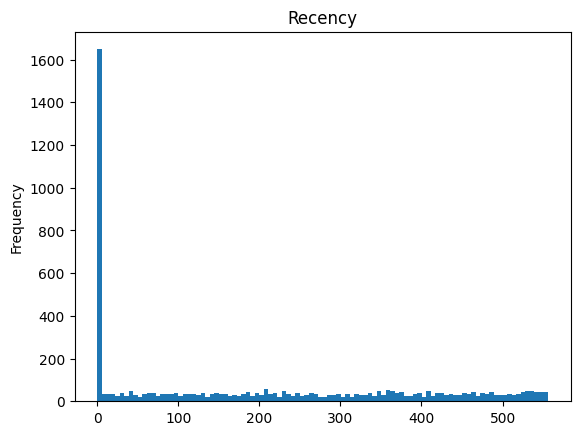

In [ ]:
RFM_CalibrationVsHoldOut['Recency In Days'].plot(kind="hist", bins=100,title="Recency")


<Axes: title={'center': 'Frequency'}, ylabel='Frequency'>

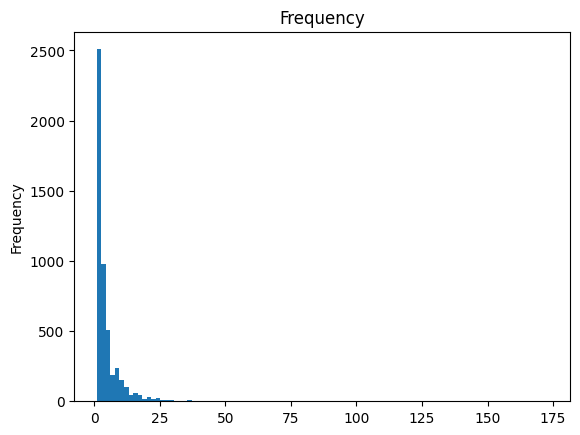

In [ ]:
RFM_CalibrationVsHoldOut['Frequency'].plot(kind="hist", bins=100,title="Frequency")

<Axes: title={'center': 'Ave Monetary Value'}, ylabel='Frequency'>

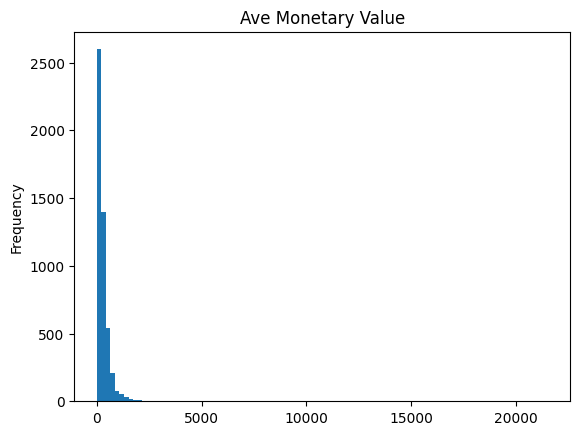

In [ ]:
RFM_CalibrationVsHoldOut['Average Monetary Value Per Order'].plot(kind="hist", bins=100,title="Ave Monetary Value")

In [ ]:
RFM_CalibrationVsHoldOut.describe()

,Customer ID,Frequency,Frequency Minus 1,Recency In Days,Age In Days,Earliest Order Date,Most Recent Order Date,Total Monetary Value,First Time Purchase Value,Average Time Between Orders In Days,Average Monetary Value Per Order,Frequency_HoldOut_Period,Total Monetary Value_HoldOut_Period
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979,4979,4979.000000,4979.000000,4978.000000,4979.000000,4979.000000,4979.000000
mean,15340.468769,4.734686,3.734686,193.218116,366.023900,2010-06-11 12:38:08.218517760,2010-12-21 17:46:15.605543168,2498.536589,448.258616,112.958988,280.907776,1.557341,917.422860
min,12346.000000,1.000000,0.000000,0.000000,0.000000,2009-12-01 07:45:00,2009-12-01 09:55:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13883.500000,1.000000,0.000000,0.000000,242.000000,2010-01-26 14:40:00,2010-10-03 12:54:00,319.575000,173.605000,0.000000,0.000000,0.000000,0.000000
50%,15336.000000,2.000000,1.000000,152.000000,402.000000,2010-05-06 12:54:00,2011-01-17 11:34:00,782.950000,301.200000,66.000000,200.170000,1.000000,90.000000
75%,16815.500000,5.000000,4.000000,363.000000,502.000000,2010-10-13 15:12:00,2011-05-05 14:16:30,2012.950000,465.360000,164.916667,370.369444,2.000000,677.400000
max,18287.000000,173.000000,172.000000,556.000000,558.000000,2011-06-12 12:00:00,2011-06-12 13:51:00,441293.980000,39916.500000,558.000000,21535.900000,82.000000,168469.600000
std,1702.748365,7.886837,7.886837,189.236873,157.502776,NaN,NaN,11187.162748,1073.273149,137.962712,534.917477,3.263085,5510.228388


## Simple "Average" Method Of Estimating Customer Lifetime Value¶
Average Customer Lifetime Value
= Annual Purchases Per Year x Ave Customer Lifespan(Years)
= (Ave Purchase Value Per Purchase x Ave Purchase Per Year) x Ave Customer Lifespan(Years)
= (Ave Purchase Value Per Purchase x (365 Days / Ave Time Between Purchase Days) ) x Ave Customer Lifespan(Years)

In [ ]:
#filter out the customers with only one purchase
AvePurchaseVal=RFM_CalibrationVsHoldOut[RFM_CalibrationVsHoldOut["Frequency"]>1]["Average Monetary Value Per Order"].mean()

print("The average purchase value across all customers with > 1 purchase was $"+str(round(AvePurchaseVal,1)))

#filter out the customers with only one purchase
AvePurchaseFrequency=(round(RFM_CalibrationVsHoldOut[RFM_CalibrationVsHoldOut["Frequency"]>1]["Average Time Between Orders In Days"].mean(),1))
AnnualAvePurchaseFrequency=(round(365/RFM_CalibrationVsHoldOut[RFM_CalibrationVsHoldOut["Frequency"]>1]["Average Time Between Orders In Days"].mean(),1))

print("The average time between orders across all customers with > 1 purchase was "+str(AvePurchaseFrequency)+" days.This translates to "+str(AnnualAvePurchaseFrequency)+" purchases per year")

The average purchase value across all customers with > 1 purchase was $416.9
The average time between orders across all customers with > 1 purchase was 167.6 days.This translates to 2.2 purchases per year


In [ ]:
AveCLV=AvePurchaseVal*AnnualAvePurchaseFrequency*2 #Assuming lifespan of 2 years
print("Average CLV= $"+str(round(AveCLV,1)))

Average CLV= $1834.3


### practical challenges :

- Diversity of Customer Segments : If the customer profiles are quite heterogenous taking simple averages can skew results
- Estimate of Ave Customer Lifespans : Requires sampling data over sufficiently long enough periods to observe enough active vs inactive customers.
- Different time scales : Customers will have joined at different points and averages will not capture discount rate effects

# PyMC marketing

## Generate Summarized RFM Data

In [ ]:
# !pip install pymc-marketing

In [ ]:
from pymc_marketing import clv

pymc_mktg_rfm_data = clv.utils.rfm_summary(
    train_data,
    customer_id_col = "Customer ID",
    datetime_col = "InvoiceDate",
    monetary_value_col = "TotalPrice",
    datetime_format = "%Y/%m/%d %H:%M:%S",
    time_unit = "D")

pymc_mktg_rfm_data.sort_values("frequency",ascending=False)

,customer_id,frequency,recency,T,monetary_value
2126,14911.0,172.0,555.0,558.0,1132.579186
2472,15311.0,149.0,553.0,558.0,596.686913
1861,14606.0,139.0,553.0,556.0,184.139856
309,12748.0,133.0,553.0,555.0,245.691805
4605,17841.0,127.0,554.0,557.0,332.505512
...,...,...,...,...,...
3461,16492.0,0.0,0.0,360.0,0.000000
3460,16491.0,0.0,0.0,233.0,0.000000
3459,16490.0,0.0,0.0,256.0,0.000000
3456,16486.0,0.0,0.0,357.0,0.000000


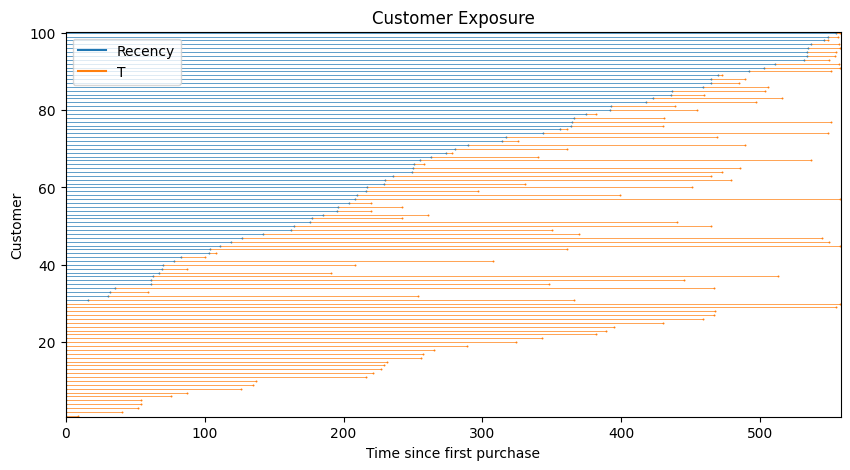

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
(
    pymc_mktg_rfm_data
    .sample(n=100, random_state=42)
    .sort_values(["recency", "T"])
    .pipe(clv.plot_customer_exposure, ax=ax, linewidth=0.5, size=0.75)
);

## Fit Customer Probability Models To The Training Data¶
### Model Purchase Frequency & Drop Out Rate (Alive/Dead Probability)

In [ ]:
bgm_map = clv.BetaGeoModel(data=pymc_mktg_rfm_data)
bgm_map.fit(fit_method="map")

Output()

Inference data with groups:
	> posterior
	> fit_data

In [ ]:
bgm_map.fit_summary()

,value
a,0.158
alpha,65.478
b,3.369
r,0.674


Fit model using MonteCarlo Markov Chain - This creates probablistic sets of results rather than point estimates

As per the documentation:

This next bit changes the default priors for the 4 parameters which unspecific will follow a HalfFlat distribution, which is an improper positive uniform distribution. For small datasets this prior can yield implausible posteriors. To avoid this problem, more informative priors can be specified by defining custom PyMC distributions.

Here, we will replace the HalfFlat default by more well-behaved HalfNormal priors with a standard deviation of 10. Customization priors is possible by passing a dictionary with keys being the name of the prior, and values being a dictionary with 2 keys: ‘dist’ representing the name of PyMC distribution and ‘kwargs’ that holds an optional dictionary of all parameters we wish to pass to the distribution

In [ ]:
model_config = {
    'a_prior': {'dist': 'HalfNormal',
                'kwargs': {'sigma': 10}},
    'b_prior': {'dist': 'HalfNormal',
                'kwargs': {'sigma': 10}},
    'alpha_prior': {'dist': 'HalfNormal',
                'kwargs': {'sigma': 10}},
    'r_prior': {'dist': 'HalfNormal',
                'kwargs': {'sigma': 10}},
}

In [ ]:
pymc_mktg_rfm_data

,customer_id,frequency,recency,T,monetary_value
0,12346.0,7.0,400.0,545.0,11066.637143
1,12347.0,4.0,221.0,224.0,729.435000
2,12348.0,3.0,190.0,258.0,495.746667
3,12349.0,2.0,182.0,409.0,801.310000
4,12350.0,0.0,0.0,130.0,0.000000
...,...,...,...,...,...
4974,18283.0,9.0,458.0,478.0,119.496667
4975,18284.0,0.0,0.0,251.0,0.000000
4976,18285.0,0.0,0.0,480.0,0.000000
4977,18286.0,1.0,247.0,543.0,833.480000


In [ ]:
bgm_mcmc = clv.BetaGeoModel(
    data = pymc_mktg_rfm_data,
    model_config = model_config,
)
bgm_mcmc.build_model()
bgm_mcmc

BG/NBD
         a ~ HalfNormal(0, 10)
         b ~ HalfNormal(0, 10)
     alpha ~ HalfNormal(0, 10)
         r ~ HalfNormal(0, 10)
likelihood ~ Potential(f(r, alpha, b, a))

In [ ]:
sample_kwargs = {
    "draws": 2_000,
    "chains": 4,
    "target_accept": 0.9,
    "random_seed": 42,
}

bgm_mcmc.fit(**sample_kwargs)

Output()

Output()

Output()

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> fit_data

In [ ]:
bgm_mcmc.fit_summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.179,0.036,0.117,0.245,0.001,0.000,3752.0,4074.0,1.0
alpha,62.585,2.116,58.672,66.647,0.033,0.024,4024.0,4066.0,1.0
b,4.056,1.214,2.095,6.266,0.020,0.015,3788.0,4042.0,1.0
r,0.654,0.018,0.620,0.686,0.000,0.000,3887.0,4115.0,1.0


array([<Axes: title={'center': 'a'}>, <Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'b'}>, <Axes: title={'center': 'r'}>],
      dtype=object)

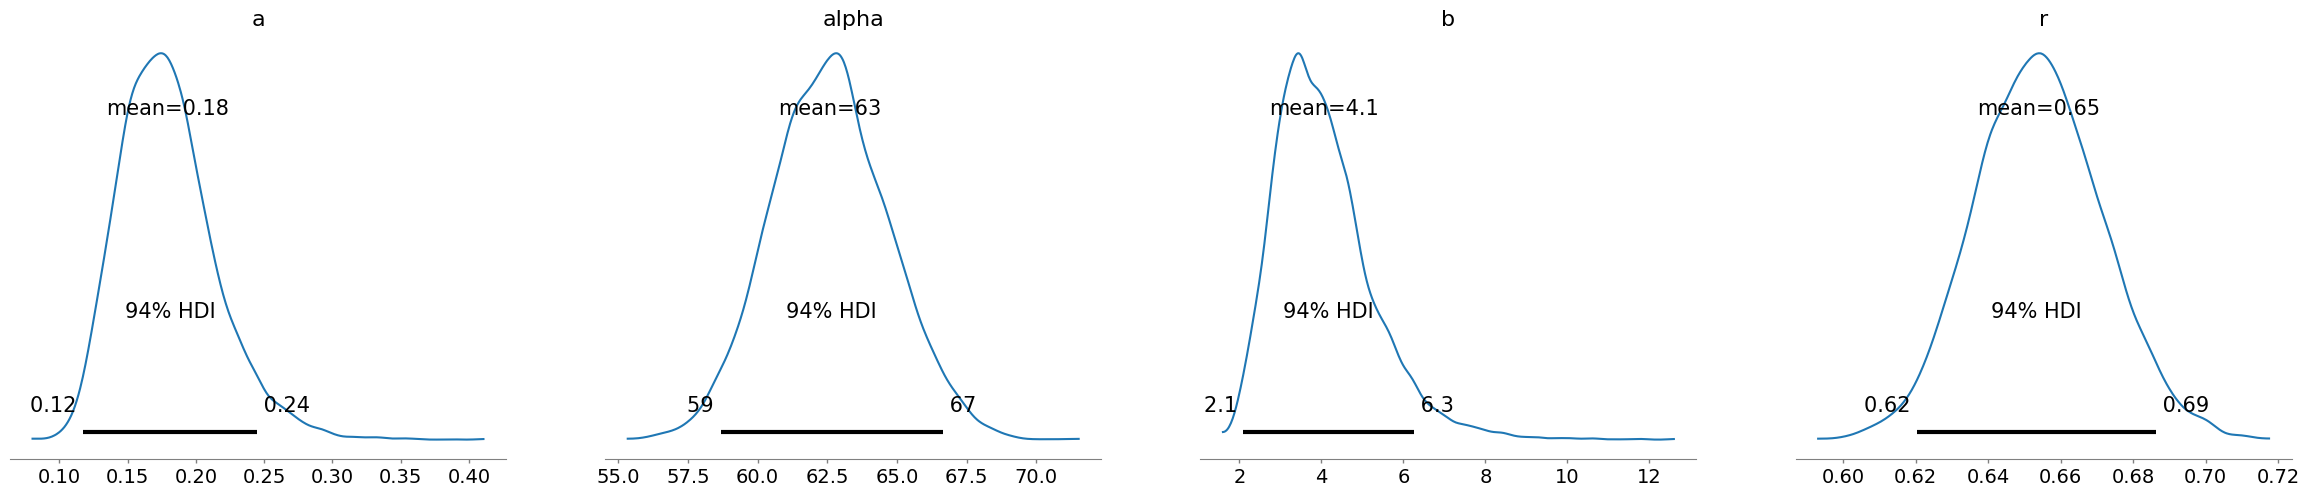

In [ ]:
import arviz as az
from arviz.labels import MapLabeller

az.plot_posterior(bgm_mcmc.fit_result)

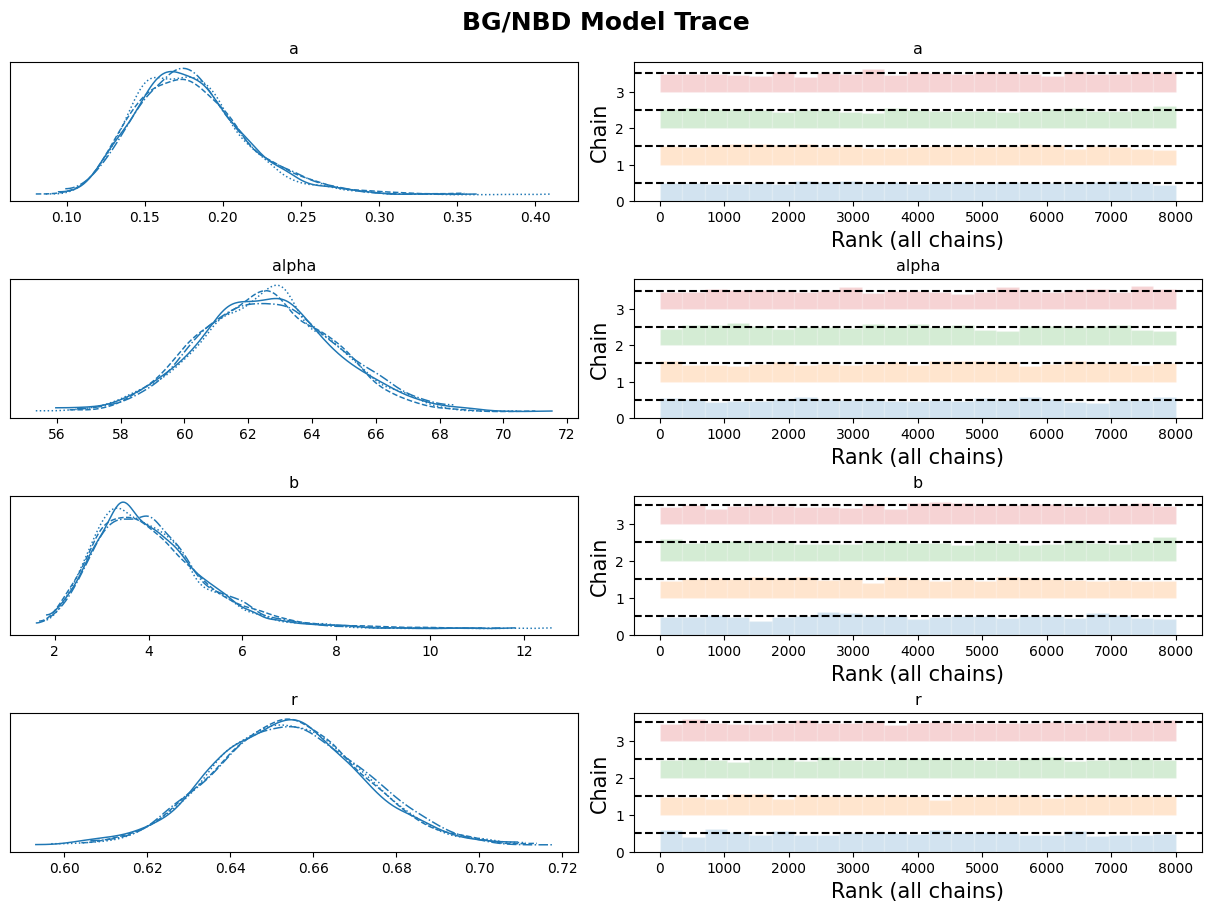

In [ ]:
# plot posterior distributions of the parameters and the rank plots

axes = az.plot_trace(
    data=bgm_mcmc.idata,
    compact=True,
    kind="rank_bars",
    backend_kwargs={"figsize": (12, 9), "layout": "constrained"},
)
plt.gcf().suptitle("BG/NBD Model Trace", fontsize=18, fontweight="bold");

In [ ]:
bgm_mcmc.idata

Inference data with groups:
	> posterior
	> sample_stats
	> fit_data

In [ ]:
# clv.plot_frequency_recency_matrix(bgm_mcmc) # High RAM usage

In [ ]:
# clv.plot_probability_alive_matrix(bgm_mcmc) #High Ram Usage

In [ ]:
# randomCustomer=np.random.choice(list(AggPurchasesByCustomerByDate['Customer ID']))

randomCustomer=17062.0

randomCustomerHistory=AggPurchasesByCustomerByDate[AggPurchasesByCustomerByDate['Customer ID'] == randomCustomer]
randomCustomerHistory[["Customer ID","InvoiceDateOnly","Total Purchase Value On Same Day"]]

randomCustomer_pymc_mktg_rfm_data_total=pd.DataFrame()
for i in range(2, len(randomCustomerHistory), 1):

    randomCustomer_pymc_mktg_rfm_data = clv.utils.rfm_summary(
    randomCustomerHistory[:i],
    customer_id_col = "Customer ID",
    datetime_col = "InvoiceDateOnly",
    monetary_value_col = "Total Purchase Value On Same Day",
    datetime_format = "%Y/%m/%d",
    time_unit = "D")

    randomCustomer_pymc_mktg_rfm_data_total=pd.concat([randomCustomer_pymc_mktg_rfm_data_total, randomCustomer_pymc_mktg_rfm_data], axis=0)

randomCustomer_pymc_mktg_rfm_data_total=randomCustomer_pymc_mktg_rfm_data_total.reset_index(drop=True)

randomCustomer_pymc_mktg_rfm_data_total=randomCustomer_pymc_mktg_rfm_data_total[1:]
randomCustomer_pymc_mktg_rfm_data_total=randomCustomer_pymc_mktg_rfm_data_total.reset_index(drop=True)

#Am sure there is a way to programmatically insert the blank lines but it was easier to manually do this....
noPurchaseDates=[[17062.0,2.0,70.0,71.0,0],
[17061.0,2.0,70.0,72.0,0],
[17063.0,2.0,70.0,73.0,0],
[17064.0,3.0,70.0,75.0,0],
[17065.0,3.0,70.0,75.0,0],
[17066.0,3.0,70.0,75.0,0],
[17067.0,3.0,70.0,76.0,0],
[17068.0,3.0,70.0,77.0,0],
[17069.0,3.0,70.0,78.0,0],
[17070.0,3.0,70.0,79.0,0],
[17071.0,3.0,70.0,80.0,0]]

noPurchaseDF=pd.DataFrame(noPurchaseDates,columns=['customer_id','frequency','recency','T','monetary_value'])
randomCustomer_pymc_mktg_rfm_data_total=pd.concat([randomCustomer_pymc_mktg_rfm_data_total, noPurchaseDF],axis=0)
randomCustomer_pymc_mktg_rfm_data_total=randomCustomer_pymc_mktg_rfm_data_total.sort_values("T",ignore_index=True)
randomCustomer_pymc_mktg_rfm_data_total=randomCustomer_pymc_mktg_rfm_data_total.reset_index(drop=True)

randomCustomer_pymc_mktg_rfm_data_total

,customer_id,frequency,recency,T,monetary_value
0,17062.0,2.0,70.0,70.0,269.515000
1,17062.0,2.0,70.0,71.0,0.000000
2,17061.0,2.0,70.0,72.0,0.000000
3,17063.0,2.0,70.0,73.0,0.000000
4,17062.0,3.0,74.0,74.0,256.203333
5,17064.0,3.0,70.0,75.0,0.000000
6,17065.0,3.0,70.0,75.0,0.000000
7,17066.0,3.0,70.0,75.0,0.000000
8,17067.0,3.0,70.0,76.0,0.000000
9,17068.0,3.0,70.0,77.0,0.000000


In [ ]:
bgm_mcmc

BG/NBD
         a ~ HalfNormal(0, 10)
         b ~ HalfNormal(0, 10)
     alpha ~ HalfNormal(0, 10)
         r ~ HalfNormal(0, 10)
likelihood ~ Potential(f(r, alpha, b, a))

In [ ]:
help(bgm_mcmc.expected_probability_alive)

Help on method expected_probability_alive in module pymc_marketing.clv.models.beta_geo:

expected_probability_alive(data: pandas.core.frame.DataFrame | None = None) -> xarray.core.dataarray.DataArray method of pymc_marketing.clv.models.beta_geo.BetaGeoModel instance
    Compute the probability a customer with history *frequency*, *recency*, and *T* is currently active.
    
    The *data* parameter is only required for out-of-sample customers.
    
    Adapted from page (2) in Bruce Hardie's notes [1]_, and *lifetimes* package:
    https://github.com/CamDavidsonPilon/lifetimes/blob/41e394923ad72b17b5da93e88cfabab43f51abe2/lifetimes/fitters/beta_geo_fitter.py#L260
    
    Parameters
    ----------
    data : *pandas.DataFrame
        Optional dataframe containing the following columns:
    
        * `customer_id`: Unique customer identifier
        * `frequency`: Number of repeat purchases
        * `recency`: Time between the first and the last purchase
        * `T`: Time between fi

In [ ]:
randomCustomer_p_alive = bgm_mcmc.expected_probability_alive(
    # customer_id=randomCustomer_pymc_mktg_rfm_data_total["customer_id"],
    # frequency=randomCustomer_pymc_mktg_rfm_data_total["frequency"],
    # recency=randomCustomer_pymc_mktg_rfm_data_total["recency"],
    # T=randomCustomer_pymc_mktg_rfm_data_total["T"],
    data= randomCustomer_pymc_mktg_rfm_data_total
)

az.plot_hdi(randomCustomer_pymc_mktg_rfm_data_total["T"], randomCustomer_p_alive, color="C0")
plt.plot(randomCustomer_pymc_mktg_rfm_data_total["T"], randomCustomer_p_alive.mean(("draw", "chain")), marker="o")
plt.axvline(randomCustomer_pymc_mktg_rfm_data_total["recency"].iloc[0], c="black", ls="--", label="Purchase")

plt.title("Probability Customer will purchase again")
plt.xlabel("T")
plt.ylabel("p")
plt.legend();

ValueError: Column customer_id has duplicate entries

   customer_id  frequency  recency     T
0      17062.0        2.0     70.0  70.0
2      17061.0        2.0     70.0  72.0
3      17063.0        2.0     70.0  73.0
5      17064.0        3.0     70.0  75.0
6      17065.0        3.0     70.0  75.0
False


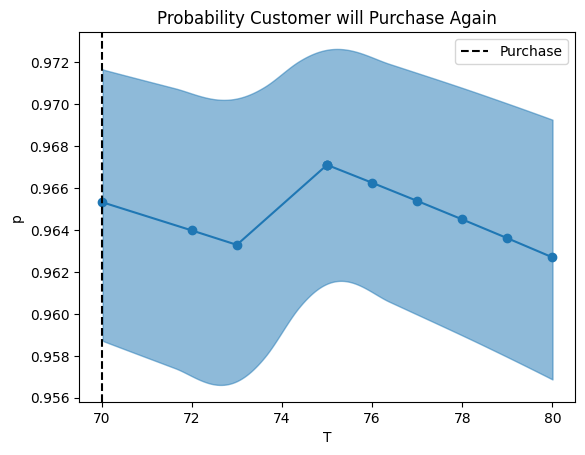

In [ ]:
# Step 1: Prepare the DataFrame by selecting necessary columns
data = randomCustomer_pymc_mktg_rfm_data_total[["customer_id", "frequency", "recency", "T"]]

# Step 2: Remove duplicate entries based on 'customer_id'
data = data.drop_duplicates(subset="customer_id")

# Alternatively, if duplicates are due to multiple rows for the same customer, aggregate the data
# data = randomCustomer_pymc_mktg_rfm_data_total.groupby("customer_id").agg({
#     "frequency": "sum",    # Sum the frequencies
#     "recency": "max",      # Max recency (time since last purchase)
#     "T": "max"             # Max T (time since first purchase)
# }).reset_index()

# Step 3: Check if there are any duplicates after dropping/aggregating
print(data.head())  # Check the first few rows of the prepared data
print(data["customer_id"].duplicated().any())  # Ensure no duplicates (should return False)

# Step 4: Call the expected_probability_alive method with the prepared data
randomCustomer_p_alive = bgm_mcmc.expected_probability_alive(data=data)

# Step 5: Plot the results
import arviz as az
import matplotlib.pyplot as plt

az.plot_hdi(data["T"], randomCustomer_p_alive, color="C0")
plt.plot(data["T"], randomCustomer_p_alive.mean(("draw", "chain")), marker="o")
plt.axvline(data["recency"].iloc[0], c="black", ls="--", label="Purchase")

# Add titles and labels
plt.title("Probability Customer will Purchase Again")
plt.xlabel("T")
plt.ylabel("p")
plt.legend()

# Display the plot
plt.show()


In [ ]:
data

,customer_id,frequency,recency,T
0,17062.0,2.0,70.0,70.0
2,17061.0,2.0,70.0,72.0
3,17063.0,2.0,70.0,73.0
5,17064.0,3.0,70.0,75.0
6,17065.0,3.0,70.0,75.0
7,17066.0,3.0,70.0,75.0
8,17067.0,3.0,70.0,76.0
9,17068.0,3.0,70.0,77.0
10,17069.0,3.0,70.0,78.0
11,17070.0,3.0,70.0,79.0


In [ ]:
# randomCustomer_pymc_mktg_rfm_data_total["Prob Of Alive"]=randomCustomer_p_alive.mean(("chain", "draw")).values
randomCustomer_pymc_mktg_rfm_data_total

,customer_id,frequency,recency,T,monetary_value
0,17062.0,2.0,70.0,70.0,269.515000
1,17062.0,2.0,70.0,71.0,0.000000
2,17061.0,2.0,70.0,72.0,0.000000
3,17063.0,2.0,70.0,73.0,0.000000
4,17062.0,3.0,74.0,74.0,256.203333
5,17064.0,3.0,70.0,75.0,0.000000
6,17065.0,3.0,70.0,75.0,0.000000
7,17066.0,3.0,70.0,75.0,0.000000
8,17067.0,3.0,70.0,76.0,0.000000
9,17068.0,3.0,70.0,77.0,0.000000


In [ ]:
prob_of_alive = bgm_mcmc.expected_probability_alive(
    # customer_id=pymc_mktg_rfm_data["customer_id"],
    # frequency=pymc_mktg_rfm_data["frequency"],
    # recency=pymc_mktg_rfm_data["recency"],
    # T=pymc_mktg_rfm_data["T"] # add t days NoOfDaysToPredict.days
    data =pymc_mktg_rfm_data
)

In [ ]:
prob_of_alive

<xarray.DataArray (chain: 4, draw: 2000, customer_id: 4979)> Size: 319MB
array([[[0.88731381, 0.97602384, 0.93706807, ..., 1.        ,
         0.87609688, 0.96777658],
        [0.87440868, 0.97385381, 0.93403378, ..., 1.        ,
         0.88200073, 0.96584466],
        [0.86730804, 0.97267141, 0.93028745, ..., 1.        ,
         0.87549846, 0.96427135],
        ...,
        [0.89887916, 0.97843377, 0.94278184, ..., 1.        ,
         0.88462141, 0.97078644],
        [0.84056252, 0.96972007, 0.92748758, ..., 1.        ,
         0.89120873, 0.96263798],
        [0.85690954, 0.97293221, 0.93447976, ..., 1.        ,
         0.89926373, 0.96637581]],

       [[0.89749305, 0.97799463, 0.9427677 , ..., 1.        ,
         0.88643089, 0.97042563],
        [0.87836995, 0.97322482, 0.9292009 , ..., 1.        ,
         0.85521777, 0.96354435],
        [0.86904565, 0.97264719, 0.93077512, ..., 1.        ,
         0.8769113 , 0.9642193 ],
...
        [0.87429589, 0.97499784, 0.93803096, ..., 1.        ,
         0.89630844, 0.96805161],
        [0.86858005, 0.97200075, 0.92802215, ..., 1.        ,
         0.86734516, 0.96287489],
        [0.87863018, 0.97461254, 0.93519231, ..., 1.        ,
         0.88049138, 0.96656966]],

       [[0.86817553, 0.97074303, 0.92371147, ..., 1.        ,
         0.84916585, 0.96041976],
        [0.88233047, 0.97502408, 0.9357028 , ..., 1.        ,
         0.87739307, 0.96680312],
        [0.87157739, 0.97404379, 0.93435933, ..., 1.        ,
         0.88744365, 0.96638474],
        ...,
        [0.88691063, 0.97524097, 0.93421605, ..., 1.        ,
         0.86260285, 0.96621009],
        [0.87771956, 0.97253207, 0.92702866, ..., 1.        ,
         0.84443457, 0.96225971],
        [0.88161075, 0.97535199, 0.93655771, ..., 1.        ,
         0.88252026, 0.96744698]]])
Coordinates:
  * customer_id  (customer_id) float64 40kB 1.235e+04 1.235e+04 ... 1.829e+04
  * chain        (chain) int64 32B 0 1 2 3
  * draw         (draw) int64 16kB 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999

In [ ]:
predict_future_purchases = bgm_mcmc.expected_num_purchases(
    customer_id=pymc_mktg_rfm_data["customer_id"],
    t=NoOfDaysToPredict.days,
    frequency=pymc_mktg_rfm_data["frequency"],
    recency=pymc_mktg_rfm_data["recency"],
    T=pymc_mktg_rfm_data["T"]
)

/usr/local/lib/python3.10/dist-packages/pymc_marketing/clv/models/beta_geo.py:291: FutureWarning: Deprecated method. Use 'expected_purchases' instead.
  warnings.warn(


In [ ]:
predict_future_purchases

<xarray.DataArray (chain: 4, draw: 2000, customer_id: 4979)> Size: 319MB
array([[[1.97322103, 2.76487152, 1.87227337, ..., 0.21916124,
         0.42765453, 1.3761012 ],
        [1.92741201, 2.7149156 , 1.83903117, ..., 0.21407478,
         0.4252228 , 1.35777739],
        [1.92493252, 2.75025107, 1.85642672, ..., 0.21828501,
         0.4267999 , 1.36945068],
        ...,
        [2.0020136 , 2.78251264, 1.88636637, ..., 0.21243743,
         0.42745844, 1.37931279],
        [1.8492891 , 2.71200438, 1.83090345, ..., 0.20684244,
         0.42569004, 1.35285009],
        [1.89198701, 2.73416432, 1.85388054, ..., 0.21155334,
         0.43333245, 1.36454788]],

       [[1.98332172, 2.73360609, 1.86061934, ..., 0.21668515,
         0.42925974, 1.3675989 ],
        [1.94839858, 2.74494613, 1.84640799, ..., 0.21339442,
         0.41288208, 1.36278467],
        [1.91768401, 2.72170239, 1.8356593 , ..., 0.20808359,
         0.41902606, 1.35476093],
...
        [1.92931379, 2.72767777, 1.85312703, ..., 0.21370537,
         0.43250263, 1.36390093],
        [1.92090356, 2.73337203, 1.83559272, ..., 0.20395063,
         0.41205972, 1.35401399],
        [1.94269853, 2.7303114 , 1.85151994, ..., 0.21961116,
         0.42892428, 1.36598433]],

       [[1.91581417, 2.71482154, 1.81760756, ..., 0.20378987,
         0.40246826, 1.34573971],
        [1.95091535, 2.72921022, 1.85159017, ..., 0.22107061,
         0.42825313, 1.36641474],
        [1.93286322, 2.75664825, 1.86036078, ..., 0.2063577 ,
         0.42433114, 1.36600289],
        ...,
        [1.97064328, 2.75449578, 1.86283978, ..., 0.22208497,
         0.42261785, 1.3731022 ],
        [1.94326924, 2.7279918 , 1.83581687, ..., 0.21891806,
         0.41069658, 1.35986526],
        [1.95587053, 2.75285152, 1.86473067, ..., 0.21681928,
         0.42882994, 1.37146337]]])
Coordinates:
  * chain        (chain) int64 32B 0 1 2 3
  * draw         (draw) int64 16kB 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
  * customer_id  (customer_id) float64 40kB 1.235e+04 1.235e+04 ... 1.829e+04

In [ ]:
sdata = pymc_mktg_rfm_data.copy()
predictionColName="expected_purchases in "+str(NoOfDaysToPredict.days)+" Days"
sdata[predictionColName] = predict_future_purchases.mean(("chain", "draw")).values
sdata.sort_values(by=predictionColName,ascending=False)

predictionColName2="Prob of Alive At End Of Calibration Period"
sdata[predictionColName2] = prob_of_alive.mean(("chain", "draw")).values
sdata

,customer_id,frequency,recency,T,monetary_value,expected_purchases in 179 Days,Prob of Alive At End Of Calibration Period
0,12346.0,7.0,400.0,545.0,11066.637143,1.936977,0.875209
1,12347.0,4.0,221.0,224.0,729.435000,2.738658,0.974046
2,12348.0,3.0,190.0,258.0,495.746667,1.851544,0.933735
3,12349.0,2.0,182.0,409.0,801.310000,0.820852,0.830010
4,12350.0,0.0,0.0,130.0,0.000000,0.590509,1.000000
...,...,...,...,...,...,...,...
4974,18283.0,9.0,458.0,478.0,119.496667,3.062905,0.979204
4975,18284.0,0.0,0.0,251.0,0.000000,0.366374,1.000000
4976,18285.0,0.0,0.0,480.0,0.000000,0.213335,1.000000
4977,18286.0,1.0,247.0,543.0,833.480000,0.424057,0.878580


In [ ]:
X=365
print(bgm_mcmc.expected_purchases_new_customer(t=X)[-1])

<xarray.DataArray (draw: 2000, customer_id: 4979)> Size: 80MB
array([[3.22837845, 3.22837845, 3.22837845, ..., 3.22837845, 3.22837845,
        3.22837845],
       [3.36354598, 3.36354598, 3.36354598, ..., 3.36354598, 3.36354598,
        3.36354598],
       [3.45797327, 3.45797327, 3.45797327, ..., 3.45797327, 3.45797327,
        3.45797327],
       ...,
       [3.46277858, 3.46277858, 3.46277858, ..., 3.46277858, 3.46277858,
        3.46277858],
       [3.34213116, 3.34213116, 3.34213116, ..., 3.34213116, 3.34213116,
        3.34213116],
       [3.45822594, 3.45822594, 3.45822594, ..., 3.45822594, 3.45822594,
        3.45822594]])
Coordinates:
    chain        int64 8B 3
  * draw         (draw) int64 16kB 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
  * customer_id  (customer_id) float64 40kB 1.235e+04 1.235e+04 ... 1.829e+04


In [ ]:
# X=365
# az.plot_posterior(bgm_mcmc.expected_purchases_new_customer(t=X)[-1])

# plt.title("Expected purchases of a new customer in the first "+str(X)+" days")

# PyMC Marketing : Modelling Monetary Value Of Purchases

In [ ]:
nonzero_data = pymc_mktg_rfm_data.query("frequency>0")
nonzero_data

,customer_id,frequency,recency,T,monetary_value
0,12346.0,7.0,400.0,545.0,11066.637143
1,12347.0,4.0,221.0,224.0,729.435000
2,12348.0,3.0,190.0,258.0,495.746667
3,12349.0,2.0,182.0,409.0,801.310000
6,12352.0,5.0,130.0,212.0,352.372000
...,...,...,...,...,...
4972,18280.0,1.0,117.0,214.0,180.600000
4973,18281.0,1.0,397.0,397.0,80.820000
4974,18283.0,9.0,458.0,478.0,119.496667
4977,18286.0,1.0,247.0,543.0,833.480000


In [ ]:
nonzero_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.133086
frequency,0.133086,1.000000


In [ ]:
dataset = pd.DataFrame({
    'customer_id': nonzero_data.index,
    'monetary_value': nonzero_data["monetary_value"],
    'frequency': nonzero_data["frequency"],
})

In [ ]:
gg = clv.GammaGammaModel(
    data = dataset
)
gg.build_model()
gg

Gamma-Gamma Model (Mean Transactions)
         p ~ HalfFlat()
         q ~ HalfFlat()
         v ~ HalfFlat()
likelihood ~ Potential(f(q, p, v))

In [ ]:
sample_kwargs = {
    "draws": 2_000,
    "chains": 4,
    "target_accept": 0.9,
    "random_seed": 42,
}

gg.fit(**sample_kwargs)

Output()

Output()

Output()

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> fit_data

In [ ]:
gg.fit_summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,2.337,0.130,2.096,2.580,0.003,0.002,2366.0,2966.0,1.0
q,3.557,0.127,3.322,3.796,0.003,0.002,2469.0,2546.0,1.0
v,459.004,40.010,387.330,535.026,0.877,0.625,2126.0,2535.0,1.0


array([<Axes: title={'center': 'p'}>, <Axes: title={'center': 'q'}>,
       <Axes: title={'center': 'v'}>], dtype=object)

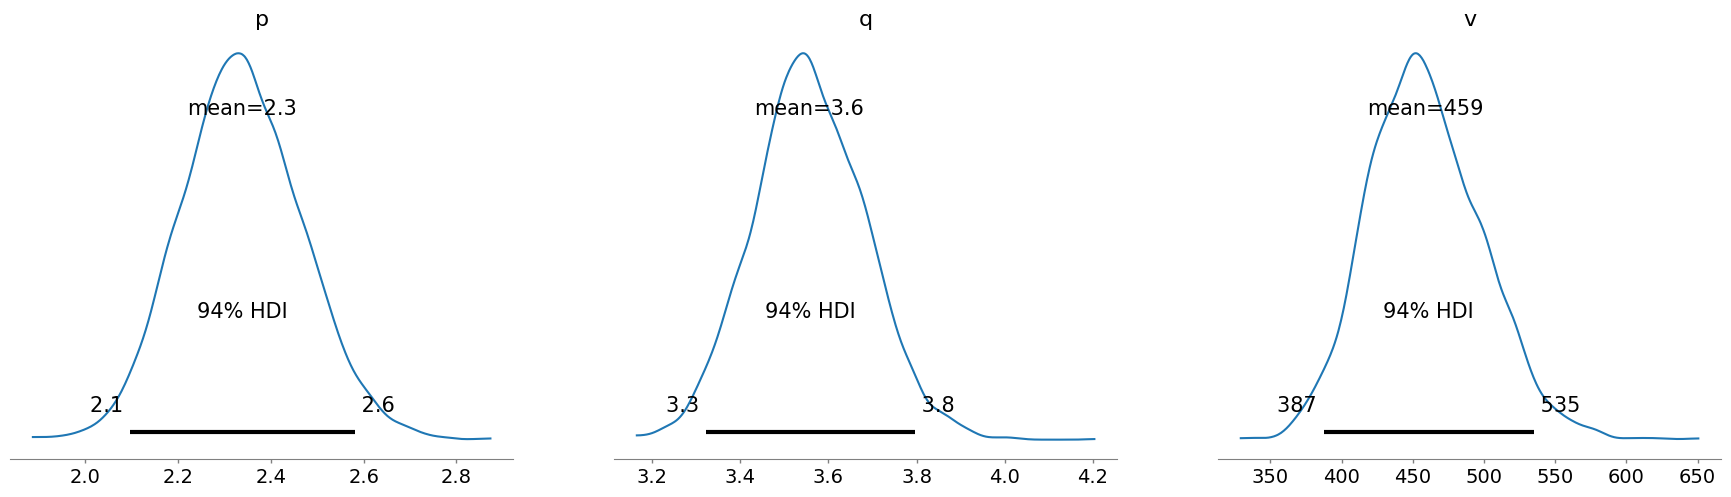

In [ ]:
az.plot_posterior(gg.fit_result)

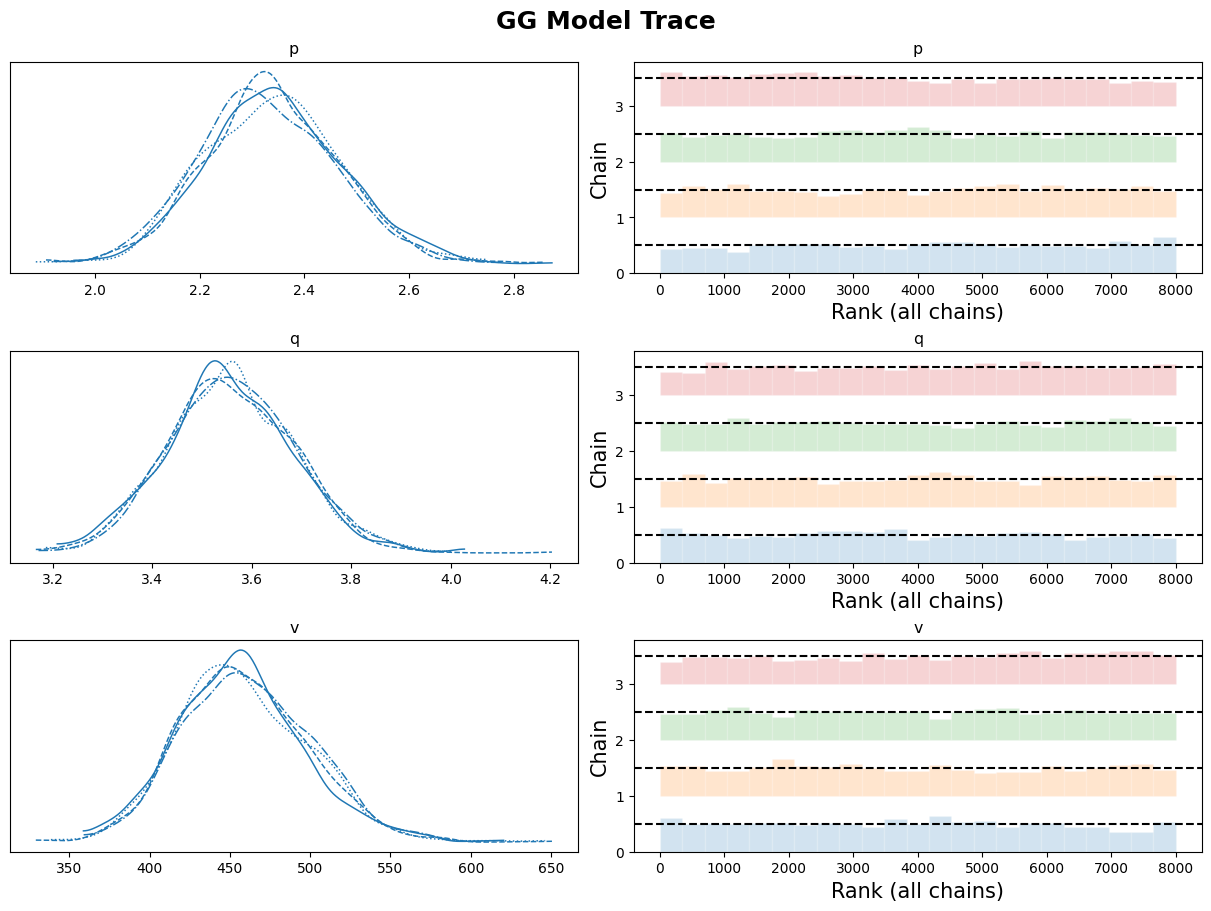

In [ ]:
# plot posterior distributions of the parameters and the rank plots

axes = az.plot_trace(
    data=gg.idata,
    compact=True,
    kind="rank_bars",
    backend_kwargs={"figsize": (12, 9), "layout": "constrained"},
)
plt.gcf().suptitle("GG Model Trace", fontsize=18, fontweight="bold");

In [ ]:
help(gg.expected_customer_spend)

Help on method expected_customer_spend in module pymc_marketing.clv.models.gamma_gamma:

expected_customer_spend(data: pandas.core.frame.DataFrame) -> xarray.core.dataarray.DataArray method of pymc_marketing.clv.models.gamma_gamma.GammaGammaModel instance
    Compute the expected future mean spend value per customer.
    
    The computations are based on Eq 5 from [1], p.3.
    
    Adapted from: https://github.com/CamDavidsonPilon/lifetimes/blob/aae339c5437ec31717309ba0ec394427e19753c4/lifetimes/fitters/gamma_gamma_fitter.py#L117
    
    data : ~pandas.DataFrame
        DataFrame containing the following columns:
    
        * `customer_id`: Unique customer identifier
        * `frequency`: Number of transactions observed for each customer
        * `monetary_value`: Mean transaction value of repeat purchases for each customer
    
    References
    ----------
    .. [1] Fader, P. S., & Hardie, B. G. (2013). "The Gamma-Gamma model of monetary
           value". February, 2, 1-9. h

In [ ]:
#compute the conditional expectation of the average profit per transaction for a group of one or more customers.

expected_spend = gg.expected_customer_spend(
    # customer_id=nonzero_data.index,
    # mean_transaction_value=nonzero_data["monetary_value"],
    # frequency=nonzero_data["frequency"],
    data=nonzero_data
)

In [ ]:
nonzero_data["Pred Ave Monetary Value At End Calibration Period"] = expected_spend.mean(("chain", "draw")).values
nonzero_data

<ipython-input-125-03e741835f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_data["Pred Ave Monetary Value At End Calibration Period"] = expected_spend.mean(("chain", "draw")).values


,customer_id,frequency,recency,T,monetary_value,Pred Ave Monetary Value At End Calibration Period
0,12346.0,7.0,400.0,545.0,11066.637143,9623.424787
1,12347.0,4.0,221.0,224.0,729.435000,662.383089
2,12348.0,3.0,190.0,258.0,495.746667,474.896264
3,12349.0,2.0,182.0,409.0,801.310000,665.602595
6,12352.0,5.0,130.0,212.0,352.372000,364.148919
...,...,...,...,...,...,...
4972,18280.0,1.0,117.0,214.0,180.600000,304.565199
4973,18281.0,1.0,397.0,397.0,80.820000,256.915609
4974,18283.0,9.0,458.0,478.0,119.496667,151.925241
4977,18286.0,1.0,247.0,543.0,833.480000,616.345760


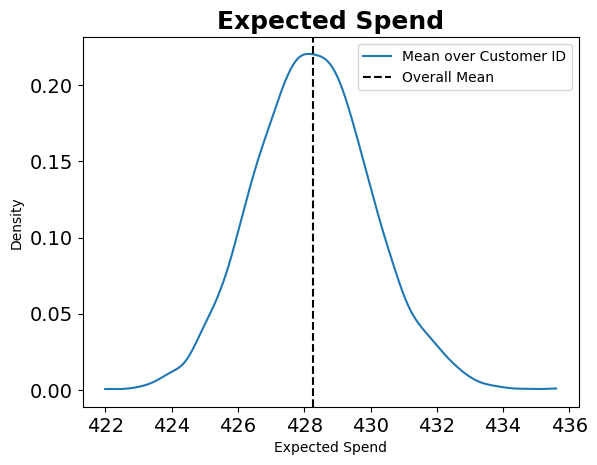

In [ ]:
fig, ax = plt.subplots()
az.plot_dist(expected_spend.mean("customer_id"), label="Mean over Customer ID", ax=ax)
ax.axvline(x=expected_spend.mean(), color="black", ls="--", label="Overall Mean")
ax.legend(loc="upper right")
ax.set(xlabel="Expected Spend", ylabel="Density")
ax.set_title("Expected Spend", fontsize=18, fontweight="bold");

# Compare BG-NBD+GG Model Predictions Against Test (Holdout) Period

In [ ]:
sdata = pymc_mktg_rfm_data.copy()
data=full_data_by_line_item_transaction_clean.sort_values('InvoiceDate')
FULL_pymc_mktg_rfm_data = clv.utils.rfm_summary(
    data,
    customer_id_col = "Customer ID",
    datetime_col = "InvoiceDate",
    monetary_value_col = "TotalPrice",
    datetime_format = "%Y/%m/%d %H:%M:%S",
    time_unit = "D")

FULL_pymc_mktg_rfm_data.rename(columns = {'frequency':'frequency_test+train period'}, inplace = True)
FULL_pymc_mktg_rfm_data=FULL_pymc_mktg_rfm_data[["frequency_test+train period"]]
sdata=sdata.join(FULL_pymc_mktg_rfm_data)

In [ ]:
sdata

,customer_id,frequency,recency,T,monetary_value,frequency_test+train period
0,12346.0,7.0,400.0,545.0,11066.637143,7.0
1,12347.0,4.0,221.0,224.0,729.435000,7.0
2,12348.0,3.0,190.0,258.0,495.746667,4.0
3,12349.0,2.0,182.0,409.0,801.310000,3.0
4,12350.0,0.0,0.0,130.0,0.000000,0.0
...,...,...,...,...,...,...
4974,18283.0,9.0,458.0,478.0,119.496667,12.0
4975,18284.0,0.0,0.0,251.0,0.000000,0.0
4976,18285.0,0.0,0.0,480.0,0.000000,3.0
4977,18286.0,1.0,247.0,543.0,833.480000,3.0


In [ ]:
help(gg.expected_customer_spend)

Help on method expected_customer_spend in module pymc_marketing.clv.models.gamma_gamma:

expected_customer_spend(data: pandas.core.frame.DataFrame) -> xarray.core.dataarray.DataArray method of pymc_marketing.clv.models.gamma_gamma.GammaGammaModel instance
    Compute the expected future mean spend value per customer.
    
    The computations are based on Eq 5 from [1], p.3.
    
    Adapted from: https://github.com/CamDavidsonPilon/lifetimes/blob/aae339c5437ec31717309ba0ec394427e19753c4/lifetimes/fitters/gamma_gamma_fitter.py#L117
    
    data : ~pandas.DataFrame
        DataFrame containing the following columns:
    
        * `customer_id`: Unique customer identifier
        * `frequency`: Number of transactions observed for each customer
        * `monetary_value`: Mean transaction value of repeat purchases for each customer
    
    References
    ----------
    .. [1] Fader, P. S., & Hardie, B. G. (2013). "The Gamma-Gamma model of monetary
           value". February, 2, 1-9. h

In [ ]:
#below computes the predictions for ALL customers in the training part of dataset (NOT just the non-zero frequency customers)

predict_future_purchases = bgm_mcmc.expected_num_purchases(
    customer_id=pymc_mktg_rfm_data["customer_id"],
    t=NoOfDaysToPredict.days,
    frequency=pymc_mktg_rfm_data["frequency"],
    recency=pymc_mktg_rfm_data["recency"],
    T=pymc_mktg_rfm_data["T"]
)

expected_spend = gg.expected_customer_spend(
    # customer_id=pymc_mktg_rfm_data["customer_id"],
    # mean_transaction_value=pymc_mktg_rfm_data["monetary_value"],
    # frequency=pymc_mktg_rfm_data["frequency"],
    data=pymc_mktg_rfm_data
)

/usr/local/lib/python3.10/dist-packages/pymc_marketing/clv/models/beta_geo.py:291: FutureWarning: Deprecated method. Use 'expected_purchases' instead.
  warnings.warn(


In [ ]:
#this bit stitches all of the predictions together in a single dataframe

sdata["Prob of Alive At End Of Calibration Period"] = prob_of_alive.mean(("chain", "draw")).values

sdata["expected_no_of_purchases in calibration period"] = predict_future_purchases.mean(("chain", "draw")).values.round(2)

sdata["actual_no_of_purchases in calibration period"]=sdata["frequency_test+train period"]-sdata["frequency"]

sdata["expected_monetary_value"] = expected_spend.mean(("chain", "draw")).values.round(2)

sdata.sort_values(by="customer_id",ascending=False)

,customer_id,frequency,recency,T,monetary_value,frequency_test+train period,Prob of Alive At End Of Calibration Period,expected_no_of_purchases in calibration period,actual_no_of_purchases in calibration period,expected_monetary_value
4978,18287.0,3.0,370.0,391.0,679.793333,27.0,0.965884,1.36,24.0,609.69
4977,18286.0,1.0,247.0,543.0,833.480000,3.0,0.878580,0.42,2.0,616.35
4976,18285.0,0.0,0.0,480.0,0.000000,3.0,1.000000,0.21,3.0,417.95
4975,18284.0,0.0,0.0,251.0,0.000000,0.0,1.000000,0.37,0.0,417.95
4974,18283.0,9.0,458.0,478.0,119.496667,12.0,0.979204,3.06,3.0,151.93
...,...,...,...,...,...,...,...,...,...,...
4,12350.0,0.0,0.0,130.0,0.000000,0.0,1.000000,0.59,0.0,417.95
3,12349.0,2.0,182.0,409.0,801.310000,3.0,0.830010,0.82,1.0,665.60
2,12348.0,3.0,190.0,258.0,495.746667,4.0,0.933735,1.85,1.0,474.90
1,12347.0,4.0,221.0,224.0,729.435000,7.0,0.974046,2.74,3.0,662.38


In [ ]:
sdata.describe()

,customer_id,frequency,recency,T,monetary_value,frequency_test+train period,Prob of Alive At End Of Calibration Period,expected_no_of_purchases in calibration period,actual_no_of_purchases in calibration period,expected_monetary_value
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000
mean,15340.468769,3.734686,193.218116,366.023900,280.907776,4.594698,0.911237,1.501133,0.860012,424.902603
std,1702.748365,7.886837,189.236873,157.502776,534.917477,9.905967,0.146663,2.284690,12.584655,355.201594
min,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,-163.000000,44.240000
25%,13883.500000,0.000000,0.000000,242.000000,0.000000,0.000000,0.892350,0.420000,-2.000000,306.310000
50%,15336.000000,1.000000,152.000000,402.000000,200.170000,2.000000,0.964901,0.860000,0.000000,417.950000
75%,16815.500000,4.000000,363.000000,502.000000,370.369444,5.000000,1.000000,1.700000,3.000000,417.950000
max,18287.000000,172.000000,556.000000,558.000000,21535.900000,254.000000,1.000000,48.540000,254.000000,10502.710000


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

freq_actual=sdata['actual_no_of_purchases in calibration period'].to_list()
freq_predicted=sdata['expected_no_of_purchases in calibration period'].to_list()
monetary_actual=sdata['monetary_value'].to_list()
monetary_predicted=sdata['expected_monetary_value'].to_list()

RMSE_For_Frequency = root_mean_squared_error(freq_actual, freq_predicted)**0.5

RMSE_For_Monetary = root_mean_squared_error(monetary_actual, monetary_predicted)**0.5

print("RMSE For Frequency In HoldOut Period = "+str(RMSE_For_Frequency.round(2))+" Purchases")
print("RMSE For Monetary Value In HoldOut Period = $"+str(RMSE_For_Monetary.round(2)))

MAE_For_Frequency = mean_absolute_error(freq_actual, freq_predicted)

MAE_For_Monetary = mean_absolute_error(monetary_actual, monetary_predicted)

print("MAE For Frequency In HoldOut Period = "+str(MAE_For_Frequency.round(2))+" Purchases")
print("MAE For Monetary Value In HoldOut Period = $"+str(MAE_For_Monetary.round(2)))

RMSE For Frequency In HoldOut Period = 3.75 Purchases
RMSE For Monetary Value In HoldOut Period = $17.39
MAE For Frequency In HoldOut Period = 6.45 Purchases
MAE For Monetary Value In HoldOut Period = $184.1


In [ ]:
from scipy.stats import spearmanr
import numpy as np

# Spearman Correlation Coefficient for Frequency
spearman_corr_freq, _ = spearmanr(freq_actual, freq_predicted)

# Spearman Correlation Coefficient for Monetary Value
spearman_corr_monetary, _ = spearmanr(monetary_actual, monetary_predicted)

# print(f"Spearman Correlation for Frequency: {spearman_corr_freq:.2f}")
print(f"Spearman Correlation for LTV: {spearman_corr_monetary:.2f}")

# Gini Coefficient Function
def gini_coefficient(values):
    sorted_values = np.sort(values)
    n = len(values)
    cumulative_sum = np.cumsum(sorted_values)
    sum_of_values = np.sum(sorted_values)

    if sum_of_values == 0:
        return 0

    # Gini numerator calculation
    gini_numerator = np.sum((2 * np.arange(1, n + 1) - n - 1) * sorted_values)

    # Gini denominator
    gini_denominator = n * sum_of_values

    # Compute normalized Gini
    gini = gini_numerator / gini_denominator

    return abs(gini)

# Example usage for Gini Coefficient
gini_freq = gini_coefficient(np.abs(np.array(freq_actual) - np.array(freq_predicted)))
gini_monetary = gini_coefficient(np.abs(np.array(monetary_actual) - np.array(monetary_predicted)))

# print(f"Normalized Gini Coefficient for Frequency: {gini_freq:.2f}")
print(f"Gini Coefficient for LTV: {gini_monetary:.2f}")


Spearman Correlation for LTV: 0.24
Gini Coefficient for LTV: 0.53


# Estimate Customer Lifetime Value BEYOND The Holdout Period¶
## Take full dataset (Calibration PLUS HOLDOUT) and rerun to get RFM characteristics

In [ ]:
full_pymc_mktg_rfm_data = clv.utils.rfm_summary(
    data,
    customer_id_col = "Customer ID",
    datetime_col = "InvoiceDate",
    monetary_value_col = "TotalPrice",
    datetime_format = "%Y/%m/%d %H:%M:%S",
    time_unit = "D")

full_pymc_mktg_rfm_data.sort_values("frequency",ascending=False)

,customer_id,frequency,recency,T,monetary_value
2541,14911.0,254.0,737.0,738.0,1162.358268
400,12748.0,202.0,735.0,735.0,279.101436
2938,15311.0,195.0,738.0,738.0,594.605846
5436,17841.0,192.0,736.0,737.0,366.423490
2239,14606.0,180.0,735.0,736.0,170.255889
...,...,...,...,...,...
2869,15242.0,0.0,0.0,422.0,0.000000
513,12861.0,0.0,0.0,619.0,0.000000
1087,13445.0,0.0,0.0,626.0,0.000000
4497,16886.0,0.0,0.0,456.0,0.000000


In [ ]:
help(bgm_mcmc.expected_probability_alive)

Help on method expected_probability_alive in module pymc_marketing.clv.models.beta_geo:

expected_probability_alive(data: pandas.core.frame.DataFrame | None = None) -> xarray.core.dataarray.DataArray method of pymc_marketing.clv.models.beta_geo.BetaGeoModel instance
    Compute the probability a customer with history *frequency*, *recency*, and *T* is currently active.
    
    The *data* parameter is only required for out-of-sample customers.
    
    Adapted from page (2) in Bruce Hardie's notes [1]_, and *lifetimes* package:
    https://github.com/CamDavidsonPilon/lifetimes/blob/41e394923ad72b17b5da93e88cfabab43f51abe2/lifetimes/fitters/beta_geo_fitter.py#L260
    
    Parameters
    ----------
    data : *pandas.DataFrame
        Optional dataframe containing the following columns:
    
        * `customer_id`: Unique customer identifier
        * `frequency`: Number of repeat purchases
        * `recency`: Time between the first and the last purchase
        * `T`: Time between fi

In [ ]:
prob_of_alive = bgm_mcmc.expected_probability_alive(
    # customer_id=full_pymc_mktg_rfm_data["customer_id"],
    # frequency=full_pymc_mktg_rfm_data["frequency"],
    # recency=full_pymc_mktg_rfm_data["recency"],
    # T=full_pymc_mktg_rfm_data["T"] # add t days NoOfDaysToPredict.days
    data = full_pymc_mktg_rfm_data
)

predictionColName2="Predicted Probability Of Customer Alive At Start Of Forecast Period"
full_pymc_mktg_rfm_data[predictionColName2] = prob_of_alive.mean(("chain", "draw")).values.round(3)
full_pymc_mktg_rfm_data

,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period
0,12346.0,7.0,400.0,725.0,11066.637143,0.492
1,12347.0,7.0,402.0,404.0,717.398571,0.982
2,12348.0,4.0,363.0,438.0,449.310000,0.949
3,12349.0,3.0,571.0,589.0,1120.056667,0.968
4,12350.0,0.0,0.0,310.0,0.000000,1.000
...,...,...,...,...,...,...
5876,18283.0,18.0,655.0,658.0,146.405556,0.991
5877,18284.0,0.0,0.0,431.0,0.000000,1.000
5878,18285.0,0.0,0.0,660.0,0.000000,1.000
5879,18286.0,1.0,247.0,723.0,833.480000,0.825


In [ ]:
forecastperiod=365 #days


predict_future_purchases = bgm_mcmc.expected_num_purchases(
    customer_id=full_pymc_mktg_rfm_data["customer_id"],
    t=365,
    frequency=full_pymc_mktg_rfm_data["frequency"],
    recency=full_pymc_mktg_rfm_data["recency"],
    T=full_pymc_mktg_rfm_data["T"]
)

predictionColName="expected_purchases in 365 Days"
full_pymc_mktg_rfm_data[predictionColName] = predict_future_purchases.mean(("chain", "draw")).values.round(2)
full_pymc_mktg_rfm_data

/usr/local/lib/python3.10/dist-packages/pymc_marketing/clv/models/beta_geo.py:291: FutureWarning: Deprecated method. Use 'expected_purchases' instead.
  warnings.warn(


,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period,expected_purchases in 365 Days
0,12346.0,7.0,400.0,725.0,11066.637143,0.492,1.70
1,12347.0,7.0,402.0,404.0,717.398571,0.982,5.62
2,12348.0,4.0,363.0,438.0,449.310000,0.949,3.10
3,12349.0,3.0,571.0,589.0,1120.056667,0.968,1.93
4,12350.0,0.0,0.0,310.0,0.000000,1.000,0.62
...,...,...,...,...,...,...,...
5876,18283.0,18.0,655.0,658.0,146.405556,0.991,9.04
5877,18284.0,0.0,0.0,431.0,0.000000,1.000,0.47
5878,18285.0,0.0,0.0,660.0,0.000000,1.000,0.32
5879,18286.0,1.0,247.0,723.0,833.480000,0.825,0.62


In [ ]:
expected_spend = gg.expected_customer_spend(
    # customer_id=full_pymc_mktg_rfm_data.index,
    # mean_transaction_value=full_pymc_mktg_rfm_data["monetary_value"],
    # frequency=full_pymc_mktg_rfm_data["frequency"],
    data=full_pymc_mktg_rfm_data
)

predictionColName3="Pred Ave Monetary Value Per Transaction"
full_pymc_mktg_rfm_data[predictionColName3] = expected_spend.mean(("chain", "draw")).values.round(2)
full_pymc_mktg_rfm_data

,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period,expected_purchases in 365 Days,Pred Ave Monetary Value Per Transaction
0,12346.0,7.0,400.0,725.0,11066.637143,0.492,1.70,9623.42
1,12347.0,7.0,402.0,404.0,717.398571,0.982,5.62,676.80
2,12348.0,4.0,363.0,438.0,449.310000,0.949,3.10,442.54
3,12349.0,3.0,571.0,589.0,1120.056667,0.968,1.93,932.12
4,12350.0,0.0,0.0,310.0,0.000000,1.000,0.62,417.95
...,...,...,...,...,...,...,...,...
5876,18283.0,18.0,655.0,658.0,146.405556,0.991,9.04,162.01
5877,18284.0,0.0,0.0,431.0,0.000000,1.000,0.47,417.95
5878,18285.0,0.0,0.0,660.0,0.000000,1.000,0.32,417.95
5879,18286.0,1.0,247.0,723.0,833.480000,0.825,0.62,616.35


In [ ]:
help(gg.expected_customer_lifetime_value)

Help on method expected_customer_lifetime_value in module pymc_marketing.clv.models.gamma_gamma:

expected_customer_lifetime_value(transaction_model: pymc_marketing.clv.models.basic.CLVModel, data: pandas.core.frame.DataFrame, future_t: int = 12, discount_rate: float = 0.0, time_unit: str = 'D') -> xarray.core.dataarray.DataArray method of pymc_marketing.clv.models.gamma_gamma.GammaGammaModel instance
    Compute the average lifetime value for a group of one or more customers.
    
    In addition, it applies a discount rate for net present value estimations.
    
    Note `future_t` is measured in months regardless of `time_unit` specified.
    
    Adapted from lifetimes package
    https://github.com/CamDavidsonPilon/lifetimes/blob/41e394923ad72b17b5da93e88cfabab43f51abe2/lifetimes/fitters/gamma_gamma_fitter.py#L246
    
    Parameters
    ----------
    transaction_model : ~CLVModel
        Predictive model for future transactions. `BetaGeoModel` and `ParetoNBDModel` are currently 

In [ ]:
clv_estimate = gg.expected_customer_lifetime_value(
    transaction_model=bgm_mcmc,
    # customer_id=full_pymc_mktg_rfm_data.index,
    # mean_transaction_value=full_pymc_mktg_rfm_data["monetary_value"],
    # frequency=full_pymc_mktg_rfm_data["frequency"],
    # recency=full_pymc_mktg_rfm_data["recency"],
    data = full_pymc_mktg_rfm_data,
    # T=full_pymc_mktg_rfm_data["T"],
    future_t=12, # months
    discount_rate=0.01, # monthly discount rate ~ 12.7% annually
    time_unit="D"
)

In [ ]:
full_pymc_mktg_rfm_data["Discounted CLV"] = clv_estimate.mean(("chain", "draw")).values.round(2)
full_pymc_mktg_rfm_data

,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period,expected_purchases in 365 Days,Pred Ave Monetary Value Per Transaction,future_spend,Discounted CLV
0,12346.0,7.0,400.0,725.0,11066.637143,0.492,1.70,9623.42,9623.424787,15103.65
1,12347.0,7.0,402.0,404.0,717.398571,0.982,5.62,676.80,676.797100,3524.88
2,12348.0,4.0,363.0,438.0,449.310000,0.949,3.10,442.54,442.536086,1270.17
3,12349.0,3.0,571.0,589.0,1120.056667,0.968,1.93,932.12,932.124912,1662.07
4,12350.0,0.0,0.0,310.0,0.000000,1.000,0.62,417.95,417.945036,240.54
...,...,...,...,...,...,...,...,...,...,...
5876,18283.0,18.0,655.0,658.0,146.405556,0.991,9.04,162.01,162.010784,1356.79
5877,18284.0,0.0,0.0,431.0,0.000000,1.000,0.47,417.95,417.945036,182.75
5878,18285.0,0.0,0.0,660.0,0.000000,1.000,0.32,417.95,417.945036,125.67
5879,18286.0,1.0,247.0,723.0,833.480000,0.825,0.62,616.35,616.345760,354.66


In [ ]:
full_pymc_mktg_rfm_data.sort_values("Discounted CLV", ascending=False).head(15)

,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period,expected_purchases in 365 Days,Pred Ave Monetary Value Per Transaction,future_spend,Discounted CLV
5695,18102.0,66.0,738.0,738.0,9189.930455,0.997,29.29,9046.32,9046.320410,245353.34
2279,14646.0,90.0,736.0,737.0,5809.905333,0.998,39.89,5744.88,5744.884190,212199.79
4064,16446.0,1.0,205.0,205.0,168469.600000,0.956,2.05,80670.39,80670.388512,153399.16
5053,17450.0,30.0,430.0,438.0,6924.523000,0.991,21.09,6694.72,6694.722296,130777.04
1791,14156.0,120.0,729.0,738.0,2607.329750,0.994,52.82,2587.47,2587.467429,126574.21
2541,14911.0,254.0,737.0,738.0,1162.358268,0.999,111.98,1159.15,1159.151808,120202.06
1732,14096.0,16.0,97.0,101.0,4071.434375,0.986,32.78,3836.79,3836.794216,116684.91
1332,13694.0,82.0,732.0,735.0,2365.279512,0.997,36.43,2339.54,2339.535095,78931.60
68,12415.0,22.0,503.0,527.0,6460.528636,0.982,13.21,6173.23,6173.227209,75508.12
5112,17511.0,50.0,735.0,737.0,3449.898200,0.996,22.27,3384.72,3384.718864,69787.32


In [ ]:
full_pymc_mktg_rfm_data.describe()

,customer_id,frequency,recency,T,monetary_value,Predicted Probability Of Customer Alive At Start Of Forecast Period,expected_purchases in 365 Days,Pred Ave Monetary Value Per Transaction,future_spend,Discounted CLV
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,15314.674205,4.630335,273.254208,474.247067,318.883972,0.906071,3.079553,433.111882,433.110464,1453.375805
std,1715.429759,10.001176,258.971689,223.142456,2256.282323,0.174138,4.727096,1106.370367,1106.370404,6469.370784
min,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.050000,41.051834,0.000000
25%,13833.000000,0.000000,0.000000,313.000000,0.000000,0.923000,0.700000,293.760000,293.763958,230.360000
50%,15313.000000,2.000000,220.000000,530.000000,213.470200,0.969000,1.760000,416.140000,416.140309,562.520000
75%,16797.000000,5.000000,512.000000,668.000000,376.086667,1.000000,3.770000,417.950000,417.945036,1257.740000
max,18287.000000,254.000000,738.000000,738.000000,168469.600000,1.000000,111.980000,80670.390000,80670.388512,245353.340000


In [ ]:
full_pymc_mktg_rfm_data["Discounted CLV"].mean().round(2)

1453.38

<Axes: ylabel='Frequency'>

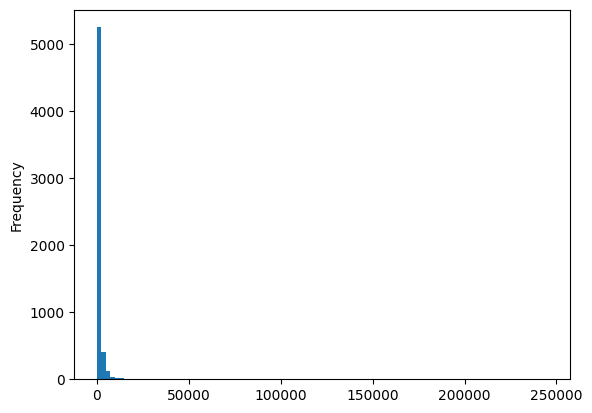

In [ ]:
full_pymc_mktg_rfm_data["Discounted CLV"].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

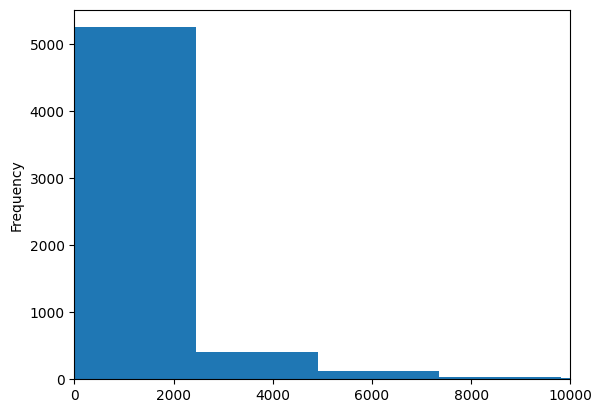

In [ ]:
full_pymc_mktg_rfm_data["Discounted CLV"].plot.hist(bins=100,xlim=(0,10000))

In [ ]:
TopTenCLV=full_pymc_mktg_rfm_data.sort_values("Discounted CLV", ascending=False).head(10).index.values
TopTenCLV

array([5695, 2279, 4064, 5053, 1791, 2541, 1732, 1332,   68, 5112])

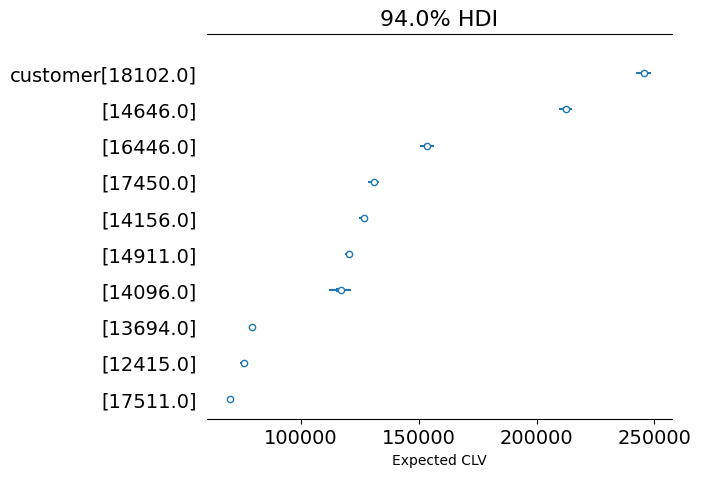

In [ ]:
labeller = MapLabeller(var_name_map={"x": "customer"})
az.plot_forest(clv_estimate.isel(customer_id=TopTenCLV), combined=True, labeller=labeller)
plt.xlabel("Expected CLV");

In [ ]:
az.summary(clv_estimate.isel(customer_id=TopTenCLV), kind="stats")

,mean,sd,hdi_3%,hdi_97%
x[18102.0],245353.340,1678.321,242291.252,248440.234
x[14646.0],212199.792,1479.766,209487.269,214899.861
x[16446.0],153399.157,1639.215,150383.835,156492.408
x[17450.0],130777.040,1306.330,128397.874,133215.716
x[14156.0],126574.206,977.620,124724.453,128303.806
x[14911.0],120202.063,857.194,118603.977,121725.661
x[14096.0],116684.909,2489.757,111966.526,121200.117
x[13694.0],78931.603,556.951,77899.911,79939.355
x[12415.0],75508.119,719.149,74116.777,76791.043
x[17511.0],69787.324,476.022,68901.003,70652.921


In [ ]:
TopTenCLV

array([5695, 2279, 4064, 5053, 1791, 2541, 1732, 1332,   68, 5112])

In [ ]:
# prompt: create predict function that takes input as frequency    recency    T    monetary_value and output CLV and CHURN using above model. This should be customer_id independent

def predict(frequency, recency, T, monetary_value):
    """
    Predicts CLV and churn probability for a customer based on RFM values.

    Args:
        frequency: Customer's frequency.
        recency: Customer's recency.
        T: Customer's T value.
        monetary_value: Customer's monetary value.

    Returns:
        A tuple containing the predicted CLV and churn probability.
    """

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'customer_id': [0],  # Dummy customer ID, not used in prediction
        'frequency': [frequency],
        'recency': [recency],
        'T': [T],
        'monetary_value': [monetary_value]
    })

    # Predict probability of being alive
    p_alive = bgm_mcmc.expected_probability_alive(data=input_data)
    churn_probability = 1 - p_alive.mean(("draw", "chain"))


    # Predict expected number of purchases in the future
    # Assuming future_t and discount_rate are defined globally as in the original code

    # Predict expected monetary value per transaction
    expected_spend = gg.expected_customer_spend(data=input_data)

    # Calculate CLV (you might need to adjust the future_t and discount_rate)
    clv_estimate = gg.expected_customer_lifetime_value(
        transaction_model=bgm_mcmc,
        data = input_data,
        future_t=12, # months (as in original code)
        discount_rate=0.01, # monthly discount rate
        time_unit="D"
    )

    predicted_clv = clv_estimate.mean(("chain", "draw"))

    return predicted_clv, churn_probability

In [ ]:
# prompt: provide sample input for above function

# Sample input for the predict function
frequency = 10  # Example frequency
recency = 100  # Example recency
T = 100      # Example T value
monetary_value = 50  # Example monetary value

predicted_clv, churn_probability = predict(frequency, recency, T, monetary_value)

print(f"Predicted CLV: {predicted_clv.values[0]}")
print(f"Churn Probability: {churn_probability.values[0]}")


Predicted CLV: 1699.440270483257
Churn Probability: 0.013444173605205556


In [ ]:
!pip install cloudpickle

In [ ]:

import cloudpickle

# Assuming 'bgm_mcmc' and 'gg' are your fitted models
with open('bgm_mcmc_model.pkl', 'wb') as f:
    cloudpickle.dump(bgm_mcmc, f)

with open('gg_model.pkl', 'wb') as f:
    cloudpickle.dump(gg, f)

In [ ]:
# prompt: load the models and create prediction endpoint using those

import pandas as pd
import numpy as np
import cloudpickle

# Load the saved models
with open('bgm_mcmc_model.pkl', 'rb') as f:
    bgm_mcmc = cloudpickle.load(f)

with open('gg_model.pkl', 'rb') as f:
    gg = cloudpickle.load(f)

def predict(frequency, recency, T, monetary_value):
    """
    Predicts CLV and churn probability for a customer based on RFM values.

    Args:
        frequency: Customer's frequency.
        recency: Customer's recency.
        T: Customer's T value.
        monetary_value: Customer's monetary value.

    Returns:
        A tuple containing the predicted CLV and churn probability.
    """

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'customer_id': [0],  # Dummy customer ID, not used in prediction
        'frequency': [frequency],
        'recency': [recency],
        'T': [T],
        'monetary_value': [monetary_value]
    })

    # Predict probability of being alive
    p_alive = bgm_mcmc.expected_probability_alive(data=input_data)
    churn_probability = 1 - p_alive.mean(("draw", "chain"))


    # Predict expected monetary value per transaction
    expected_spend = gg.expected_customer_spend(data=input_data)

    # Calculate CLV
    clv_estimate = gg.expected_customer_lifetime_value(
        transaction_model=bgm_mcmc,
        data = input_data,
        future_t=12,
        discount_rate=0.01,
        time_unit="D"
    )

    predicted_clv = clv_estimate.mean(("chain", "draw"))

    return predicted_clv, churn_probability

In [ ]:
# prompt: create sample input for above

# Sample input data for the predict function
# You can modify these values to test different scenarios

frequency_values = [10, 5, 20, 2, 15]  # Example frequency values
recency_values = [10, 30, 5, 75, 1]  # Example recency values
T_values = [100, 200, 50, 150, 80]    # Example T values
monetary_values = [500, 25, 100, 10, 75]  # Example monetary values

for i in range(len(frequency_values)):
    frequency = frequency_values[i]
    recency = recency_values[i]
    T = T_values[i]
    monetary_value = monetary_values[i]

    predicted_clv, churn_probability = predict(frequency, recency, T, monetary_value)
    print(f"Input: frequency={frequency}, recency={recency}, T={T}, monetary_value={monetary_value}")
    print(f"Predicted CLV: {predicted_clv.values[0]}")
    print(f"Churn Probability: {churn_probability.values[0]}")
    print("-" * 20)

Input: frequency=10, recency=10, T=100, monetary_value=500
Predicted CLV: 135.12850609564384
Churn Probability: 0.9862234461792435
--------------------
Input: frequency=5, recency=30, T=200, monetary_value=25
Predicted CLV: 72.64799956634329
Churn Probability: 0.8884839668122265
--------------------
Input: frequency=20, recency=5, T=50, monetary_value=100
Predicted CLV: 22.44630194539656
Churn Probability: 0.99641585988378
--------------------
Input: frequency=2, recency=75, T=150, monetary_value=10
Predicted CLV: 546.9555259155126
Churn Probability: 0.10224829876144059
--------------------
Input: frequency=15, recency=1, T=80, monetary_value=75
Predicted CLV: 1.119833001364476
Churn Probability: 0.9996539738748271
--------------------


In [ ]:
import sys
import cloudpickle
import platform

In [ ]:
print("Python version:", sys.version)
print("Platform:", platform.platform())
print("Cloudpickle version:", cloudpickle.__version__)

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Cloudpickle version: 3.1.0
